# Data Cleaning and Visualization Overview
In the initial phase of our project, we focused on refining the dataset through meticulous data cleaning and visualization techniques. Our objective was to enhance the quality and coherence of the data, making it more suitable for subsequent analysis. This section encapsulates our methodology and key steps in achieving a refined dataset.

## Data Cleaning
Our data cleaning process comprised handling missing values, encoding categorical features, and ensuring data integrity. Notably, we employed strategic approaches to replace null values, fostering a more complete and robust dataset. Categorical features were encoded to numerical values, facilitating machine learning model compatibility.

## Visualization
Visualization played a pivotal role in understanding the characteristics of the data and identifying patterns. Through well-crafted plots and graphs, we delved into the distribution of features, relationships between variables, and the impact of categorical features on our target variable.

## Key Steps:
1. **Handling Class Imbalance:** Class imbalance is handled using oversampling of minority class.
1. **Handling Null Values:** Robust techniques were employed to replace missing values, ensuring data completeness and reliability.
2. **Categorical Feature Encoding:** Transformation of categorical features into numerical representations for seamless integration into machine learning models.
3. **Strategic Plotting:** Visualization techniques such as histograms, scatter plots, and bar graphs were leveraged to gain insights into the distribution and relationships within the dataset.
<hr>

In [139]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#### Reading the Dataset ####

In [140]:
df = pd.read_csv("C:\\Users\\divya\\Downloads\\Rainfall-Prediction-App-main\\Rainfall-Prediction-App-main\\synthetic_weather_data.csv")
original_df = pd.read_csv("C:\\Users\\divya\\Downloads\\Rainfall-Prediction-App-main\\Rainfall-Prediction-App-main\\synthetic_weather_data.csv")
pd.set_option("display.max_columns", None)

In [141]:
df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0     2023-06-06    Chennai     16.7     23.1      13.8          4.5   
1     2025-11-12  Bangalore     17.0     23.6      14.3          9.8   
2     2017-11-19    Kolkata     10.5     21.0      18.0          0.4   
3     2029-03-12      Delhi     15.7     21.3      10.4          7.5   
4     2022-04-13       Pune     16.5     25.0       1.9          NaN   
...          ...        ...      ...      ...       ...          ...   
9995  2031-05-14     Mumbai     28.0     37.2      15.8         12.4   
9996  2023-07-22    Lucknow     21.3     34.9       7.6          9.3   
9997  2021-05-29  Bangalore     12.2     25.8      13.9          NaN   
9998  2034-11-10     Mumbai     10.1     21.7       0.4          6.7   
9999  2012-09-26    Lucknow     13.3     24.4      16.8          1.9   

      Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0          5.8           E             21        NNW          E            12   
1         11.8         ENE             40        SSW          E            20   
2          9.5           E             40          N        NNW            16   
3          NaN         NNE             43          N        WSW            19   
4          NaN         SSW             39        NNW        SSE             9   
...        ...         ...            ...        ...        ...           ...   
9995       NaN         NNE             37         NW         SW            19   
9996       0.8           E             49        ENE          E            14   
9997       8.0           W             46         NW        WSW            14   
9998       7.2         SSE             23          W        WNW            20   
9999       9.7           S             40        NNE        SSE            18   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               17           80           77       1012.3       1019.8   
1               15           94           86       1005.9       1021.7   
2                9           52           41       1011.0       1020.9   
3                7           52           39       1006.7       1009.8   
4                6           85           78       1007.7       1017.1   
...            ...          ...          ...          ...          ...   
9995             7           58           70       1012.3       1016.8   
9996             8           57           89       1010.7       1019.8   
9997            19           95           89       1022.9       1016.0   
9998            13           80           37       1018.6       1007.2   
9999            12           62           58       1009.0       1022.4   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0          6.0       1.0     22.1     21.7       Yes          Yes  
1          3.0       2.0     18.4     20.8       Yes           No  
2          NaN       NaN     16.0     10.6       Yes           No  
3          8.0       5.0     16.0     19.6       Yes          Yes  
4          NaN       2.0     21.6     23.0       Yes          Yes  
...        ...       ...      ...      ...       ...          ...  
9995       6.0       NaN     31.1     34.8       Yes          Yes  
9996       6.0       5.0     30.8     26.5       Yes          Yes  
9997       0.0       3.0     12.9     19.5       Yes          Yes  
9998       NaN       6.0     20.4     10.9       Yes           No  
9999       6.0       3.0     16.6     17.0       Yes          Yes  

[10000 rows x 23 columns]

The dataset contains a total of 23 distinct features and 145,460 observations.
<hr>

#### Looking at various types of features that may be present in the given dataset ####

In [142]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 4
Continuous feature Count 12
Categorical feature Count 7


`numerical_feature`, which contains the column names of the DataFrame df where the data type is not 'O' (i.e., not an object or a string). This list includes features that are numeric in nature, such as integers or floats. There are total of 16 `numerical_feature`.

`discrete_feature` is created, which includes the features from `numerical_feature` but only those where the number of unique values is less than 25. This suggests that these features are likely to be discrete rather than continuous, as they have a relatively small number of distinct values. There are total of 2 `discrete_feature`.

`continuous_feature` list is created by taking the elements from `numerical_feature` that are not present in the discrete_feature list. These are the numerical features that are not considered discrete, implying they may have a larger range of values and are likely continuous. There are total of 14 `continuous_feature`.

`categorical_feature` list is created by taking the columns from the DataFrame df that are not in the `numerical_feature` list. These are likely features with non-numeric data types (e.g., strings or objects), suggesting they are categorical in nature. There are total of 7 `categorical_feature`.
<hr>

### Data imbalance

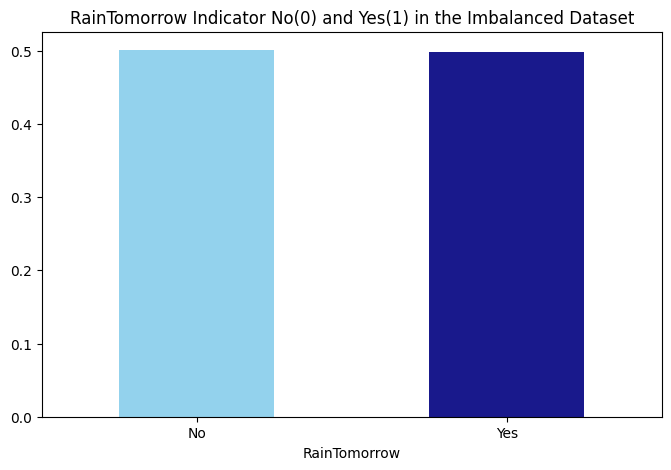

In [143]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe that presence of "0" and "1" are almost in the ratio 78:22. So there is a class imbalance and we have to handle it. For tackling class imbalance, we will use **oversampling of minority class** here. Since the size of the data set is quite small, undersampling of majority class would not make much sense here. 

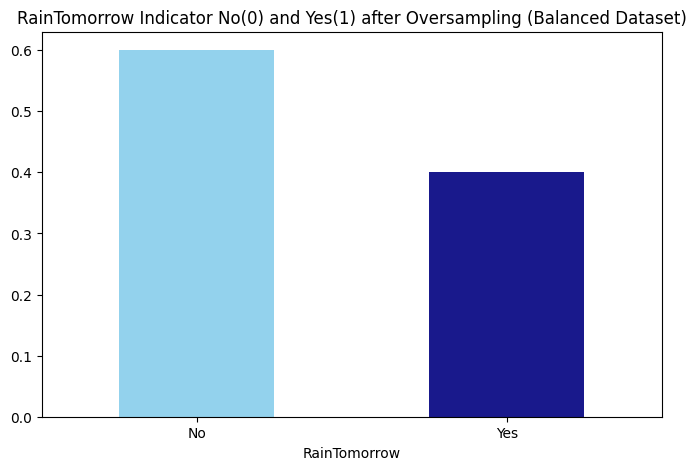

In [144]:
from sklearn.utils import resample

no = df[df.RainTomorrow == "No"]
yes = df[df.RainTomorrow == "Yes"]
yes_oversampled = resample(yes, replace=True, n_samples=int(2*len(no)/3), random_state=123)
df = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<hr>

### Examining the percentage of null values and handling it ###

In [145]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      20.225123
Sunshine         20.895701
WindGustDir       0.000000
WindGustSpeed     0.000000
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         30.259849
Cloud3pm         30.032331
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64

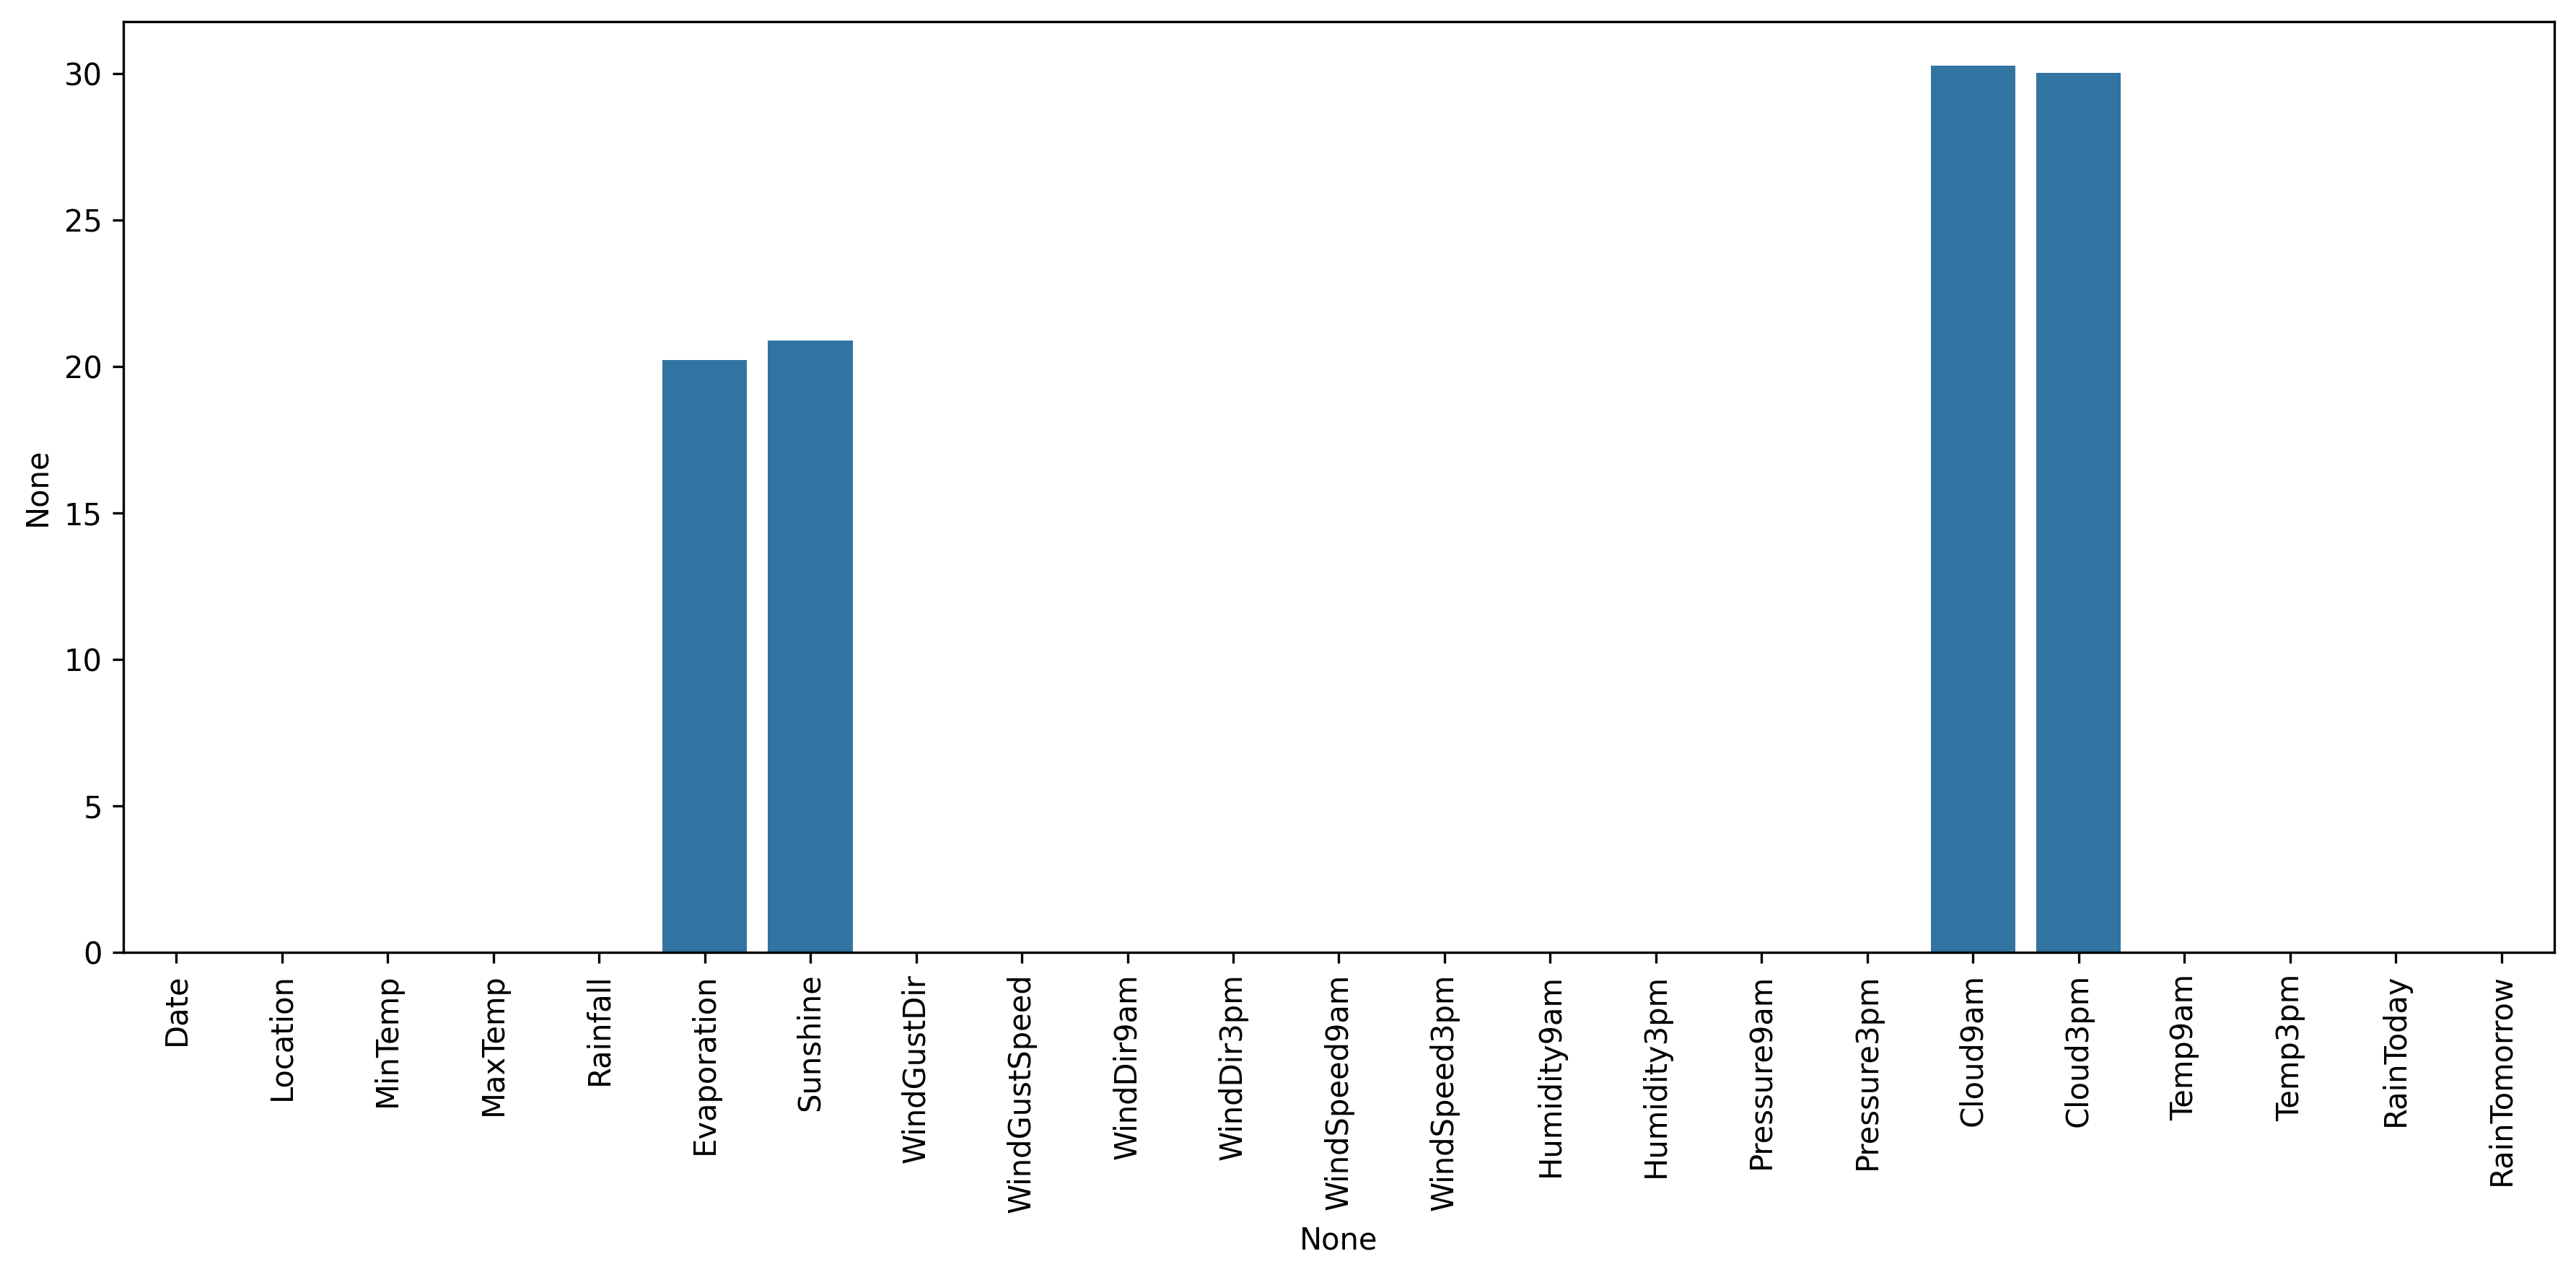

In [146]:
# Create a barplot for the column vs percentage of null values 
plt.figure(figsize=(12, 6), dpi=300)  # Adjust the figure size
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center') # to rotate the labels of x axis for better view
plt.tight_layout()

Creating a function to handle null values

In [147]:
def randomsampleimputation(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [148]:
# Let's look at the numerical_features
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Handling null values for the features that has approximately more than 40% of null values 
<br>
We have chosen to randomly fill these features

In [149]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")


In [150]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

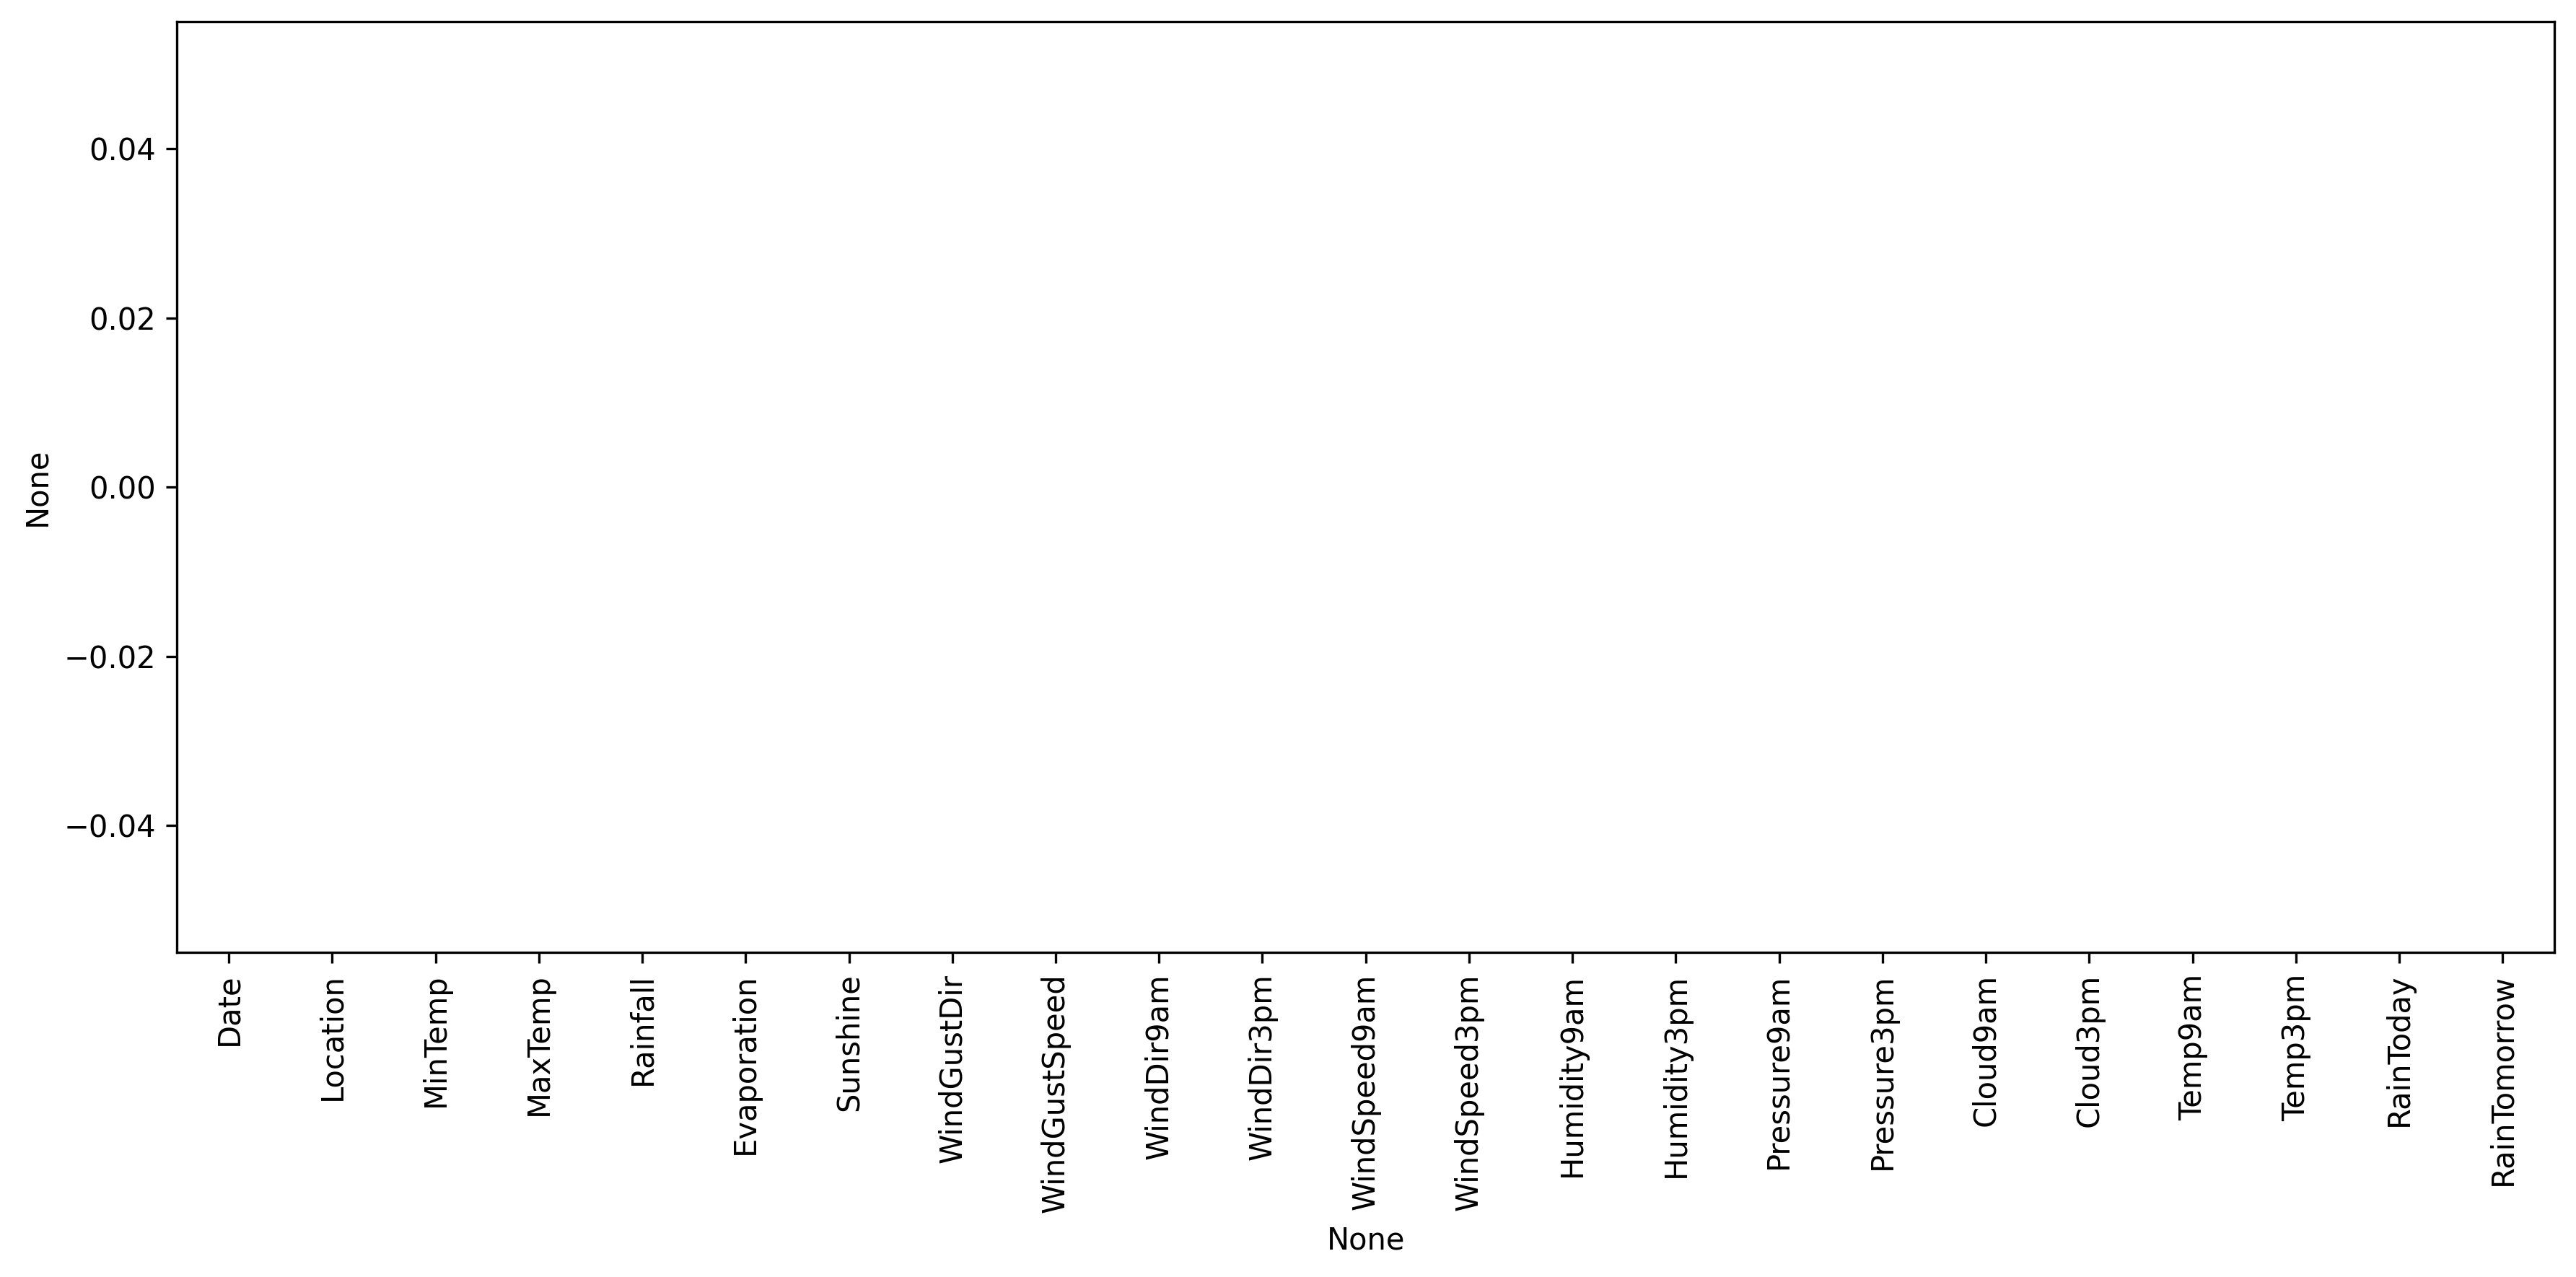

In [151]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

Next for all the continuous_feature we are replacing the null values with its median

In [152]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [153]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

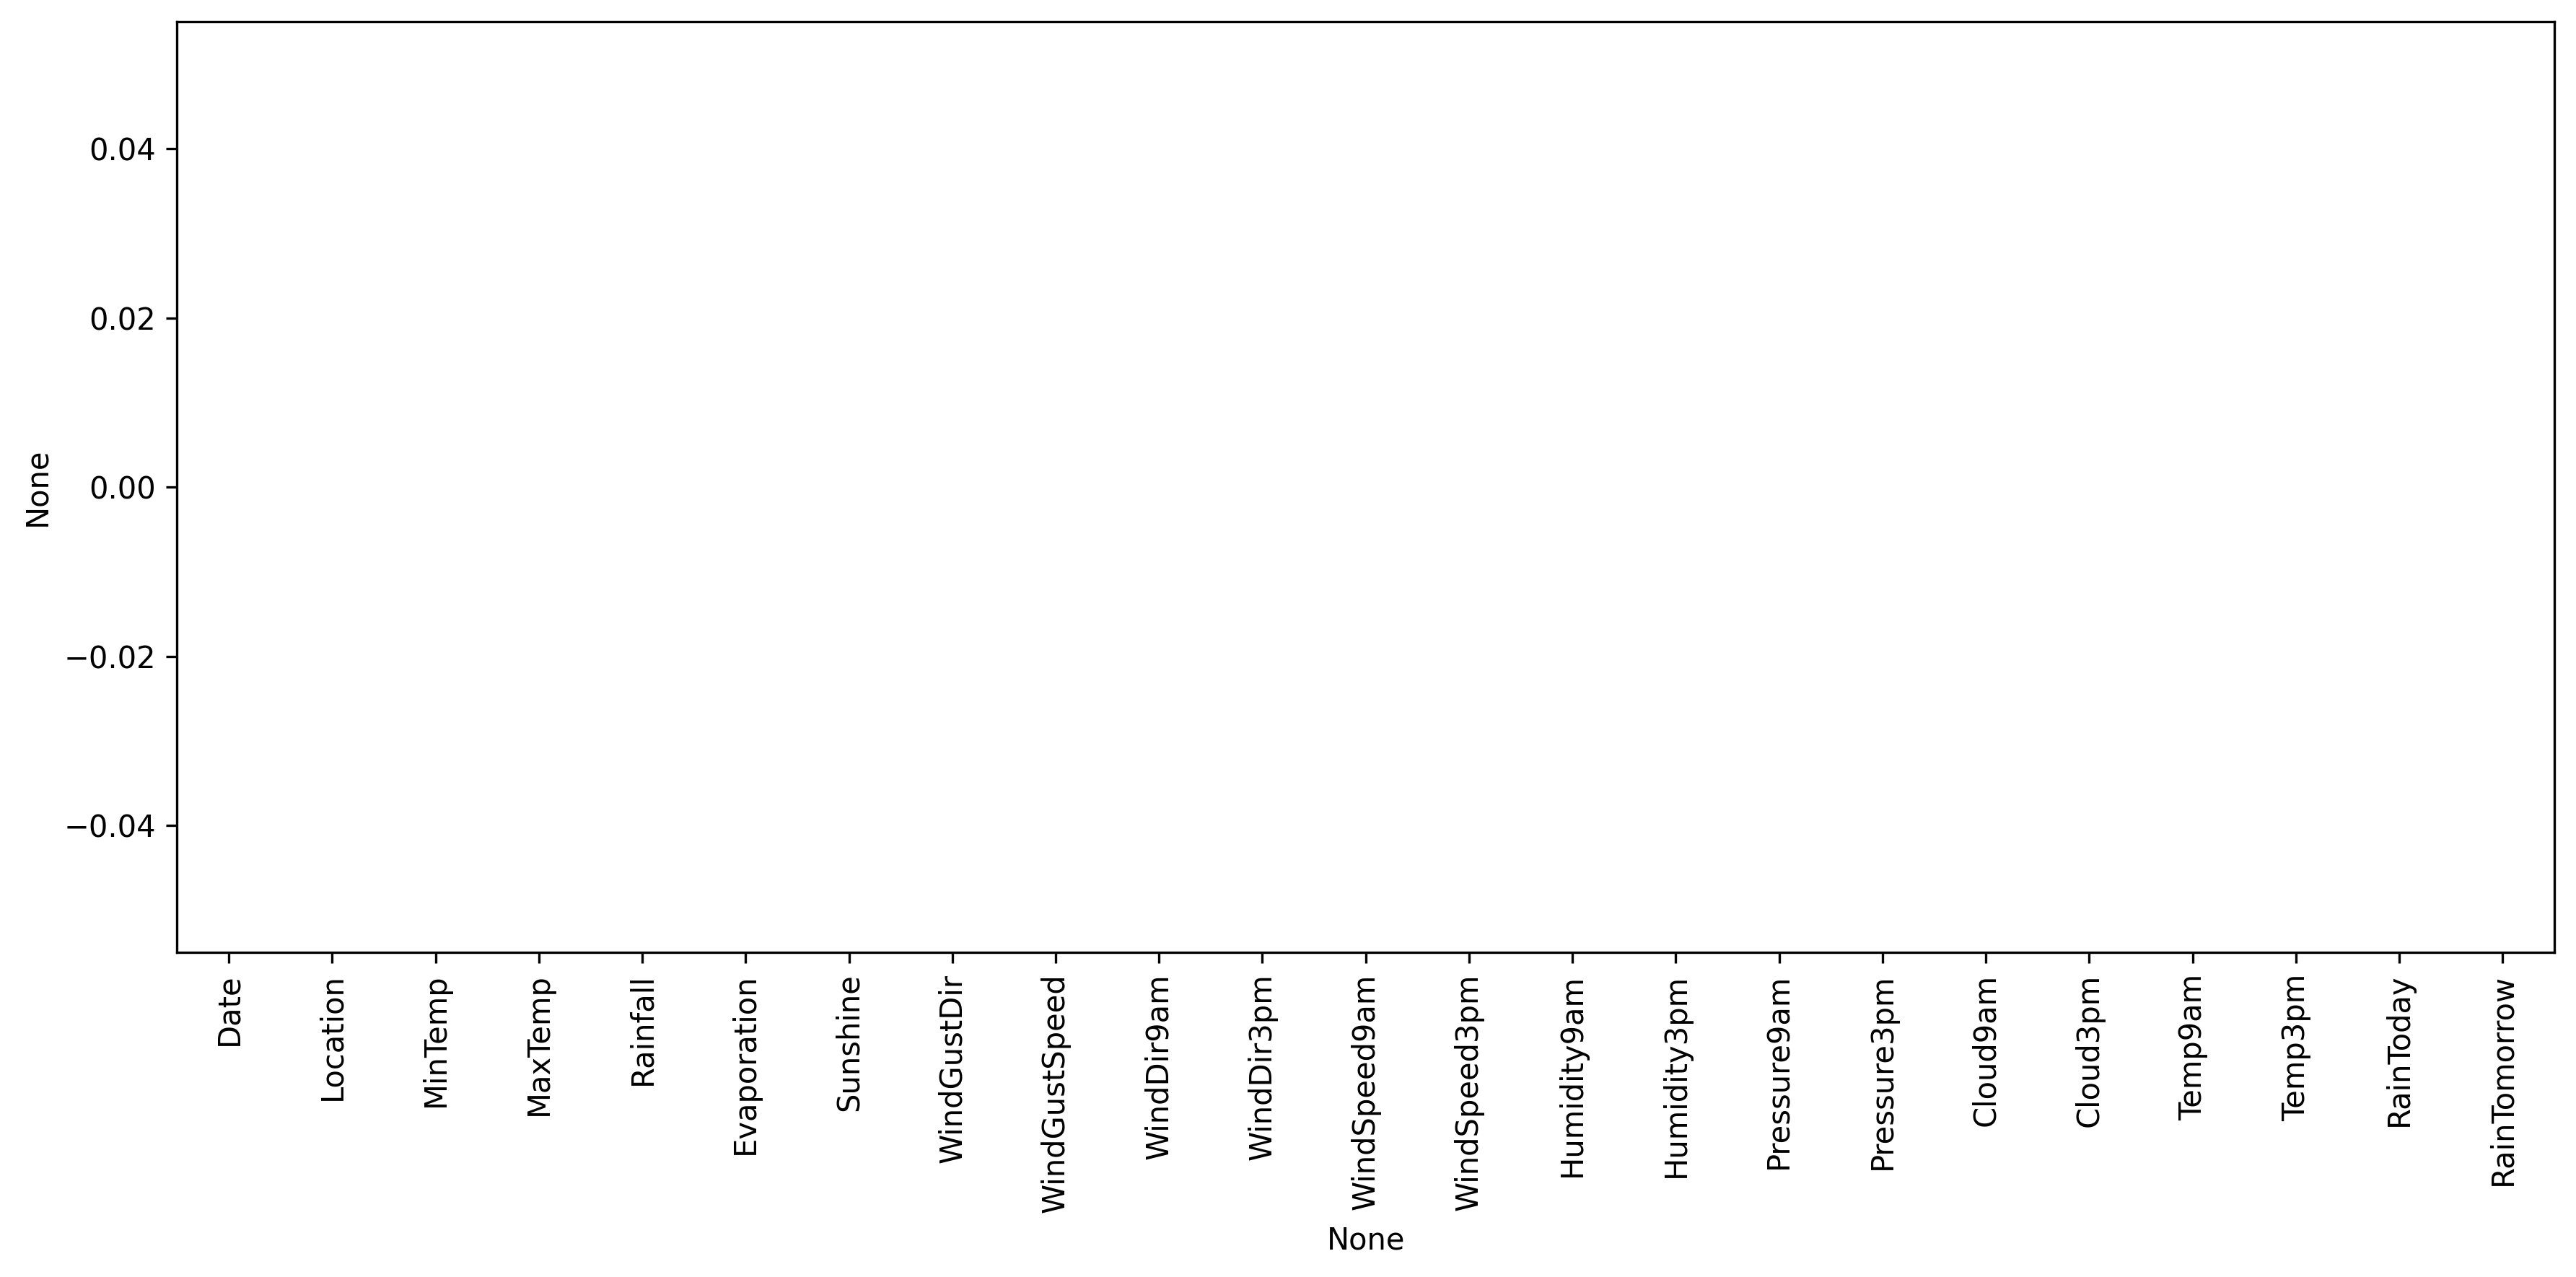

In [154]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

#### We've handled the null values numeric features now we'll proceed to deal with catagorical features, we will even encode  the catagorical data along with this process ####

For the RainToday and RainTomorrow data we have either yes or no therefore we can replace this data with 0 and 1 which means no and yes respectively.

In [155]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
1     2025-11-12  Bangalore     17.0     23.6      14.3          9.8   
2     2017-11-19    Kolkata     10.5     21.0      18.0          0.4   
6     2012-12-09    Chennai     13.9     21.5      18.7          8.6   
8     2026-03-16    Lucknow     13.7     28.7       0.2          9.2   
10    2027-11-11      Delhi     18.3     26.7      10.0         14.3   
...          ...        ...      ...      ...       ...          ...   
4154  2032-12-22    Chennai     20.2     34.4      19.1          9.2   
9387  2026-02-26    Kolkata     22.9     36.6      18.0         11.9   
1731  2013-04-15     Jaipur     27.5     37.4      14.3          7.2   
7839  2014-05-23  Hyderabad     22.0     28.8       6.6          7.8   
6442  2025-03-14    Kolkata     21.2     29.8      14.9          5.5   

      Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
1         11.8         ENE             40        SSW          E            20   
2          9.5           E             40          N        NNW            16   
6          3.0          NW             29        WNW         NW            19   
8          2.0         SSW             25        WSW        WNW            17   
10         2.1           N             50        SSE          W             7   
...        ...         ...            ...        ...        ...           ...   
4154      10.3         NNW             45        SSW        SSE             9   
9387      10.2         WSW             39        ESE        SSE            20   
1731       4.5           N             25         SW        ESE            18   
7839       7.0           S             20        ESE        ENE             5   
6442       2.6           E             24        WSW        NNW            19   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
1               15           94           86       1005.9       1021.7   
2                9           52           41       1011.0       1020.9   
6               18           94           55       1014.1       1016.0   
8               13           86           35       1022.5       1013.9   
10              18           77           75       1005.8       1018.6   
...            ...          ...          ...          ...          ...   
4154            16           94           84       1005.5       1022.9   
9387            18           59           80       1016.0       1005.3   
1731            18           85           84       1022.5       1011.7   
7839            11           96           80       1023.7       1010.0   
6442             6           85           79       1022.6       1006.2   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
1          3.0       2.0     18.4     20.8       True         False  
2          2.0       1.0     16.0     10.6       True         False  
6          5.0       0.0     20.5     20.3       True         False  
8          0.0       3.0     14.1     15.4       True         False  
10         8.0       3.0     25.7     19.2       True         False  
...        ...       ...      ...      ...        ...           ...  
4154       1.0       1.0     24.9     32.4       True          True  
9387       5.0       7.0     32.8     34.9       True          True  
1731       5.0       0.0     32.3     36.8       True          True  
7839       5.0       4.0     24.4     22.9       True          True  
6442       1.0       5.0     25.7     23.3       True          True  

[8351 rows x 23 columns]

RainToday and RainTomorrow feature is now replaced by True or False

For the features like WindGustDir, WindDir9am and WindDir3pm null values are replaced by the value which has the max frequency.<br>
First let's look at the values these features contains

In [156]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2035-04-11', '2008-01-20', '2035-04-06', '2035-05-08', '2035-04-24',
       '2035-05-16', '2008-01-12', '2035-02-09', '2035-02-12', '2035-02-13',
       ...
       '2016-03-17', '2016-01-13', '2016-01-16', '2016-03-26', '2008-04-05',
       '2008-02-14', '2008-02-15', '2008-02-20', '2035-01-18', '2035-01-20'],
      dtype='object', name='Date', length=5238)
Location Index(['Bangalore', 'Jaipur', 'Pune', 'Lucknow', 'Kolkata', 'Delhi',
       'Ahmedabad', 'Chennai', 'Mumbai', 'Hyderabad'],
      dtype='object', name='Location')
WindGustDir Index(['WSW', 'N', 'W', 'SSW', 'NNE', 'SSE', 'NNW', 'NE', 'NW', 'ESE', 'E',
       'S', 'ENE', 'SW', 'SE', 'WNW'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['NW', 'SSW', 'N', 'WNW', 'SE', 'NE', 'NNW', 'NNE', 'W', 'WSW', 'S',
       'ENE', 'E', 'SSE', 'ESE', 'SW'],
      dtype='object', name='WindDir9am')
WindDir3pm Index(['NW', 'SSE', 'S', 'WNW', 'NNW', 'E', 'ENE', 'SSW', 'NNE', 'NE', 'N',
       'W', 'SE', 'WSW', 'ESE', 

Now let's map these data with some numbers

In [157]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10, 'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10, 'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10, 'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

Now let's fill the null values with the value which has the maximum frequency.

In [158]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

Let's look whether do we still have any null values

In [159]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

Seems like we've dealt with all the null values in the given data

Let's look at the dataframe

In [160]:
df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
1     2025-11-12  Bangalore     17.0     23.6      14.3          9.8   
2     2017-11-19    Kolkata     10.5     21.0      18.0          0.4   
6     2012-12-09    Chennai     13.9     21.5      18.7          8.6   
8     2026-03-16    Lucknow     13.7     28.7       0.2          9.2   
10    2027-11-11      Delhi     18.3     26.7      10.0         14.3   
...          ...        ...      ...      ...       ...          ...   
4154  2032-12-22    Chennai     20.2     34.4      19.1          9.2   
9387  2026-02-26    Kolkata     22.9     36.6      18.0         11.9   
1731  2013-04-15     Jaipur     27.5     37.4      14.3          7.2   
7839  2014-05-23  Hyderabad     22.0     28.8       6.6          7.8   
6442  2025-03-14    Kolkata     21.2     29.8      14.9          5.5   

      Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
1         11.8           14             40           8          14   
2          9.5           15             40           1           1   
6          3.0            1             29           4           0   
8          2.0            8             25           6           3   
10         2.1            3             50          11           4   
...        ...          ...            ...         ...         ...   
4154      10.3            0             45           8          12   
9387      10.2            5             39          14          12   
1731       4.5            3             25           7          15   
7839       7.0            7             20          14          13   
6442       2.6           15             24           6           1   

      WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
1               20            15           94           86       1005.9   
2               16             9           52           41       1011.0   
6               19            18           94           55       1014.1   
8               17            13           86           35       1022.5   
10               7            18           77           75       1005.8   
...            ...           ...          ...          ...          ...   
4154             9            16           94           84       1005.5   
9387            20            18           59           80       1016.0   
1731            18            18           85           84       1022.5   
7839             5            11           96           80       1023.7   
6442            19             6           85           79       1022.6   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
1          1021.7       3.0       2.0     18.4     20.8       True   
2          1020.9       2.0       1.0     16.0     10.6       True   
6          1016.0       5.0       0.0     20.5     20.3       True   
8          1013.9       0.0       3.0     14.1     15.4       True   
10         1018.6       8.0       3.0     25.7     19.2       True   
...           ...       ...       ...      ...      ...        ...   
4154       1022.9       1.0       1.0     24.9     32.4       True   
9387       1005.3       5.0       7.0     32.8     34.9       True   
1731       1011.7       5.0       0.0     32.3     36.8       True   
7839       1010.0       5.0       4.0     24.4     22.9       True   
6442       1006.2       1.0       5.0     25.7     23.3       True   

      RainTomorrow  
1            False  
2            False  
6            False  
8            False  
10           False  
...            ...  
4154          True  
9387          True  
1731          True  
7839          True  
6442          True  

[8351 rows x 23 columns]

##### Our next task is to map location feature

Our approach for mapping these locations involves replacing them with the values corresponding to the locations where 'RainTomorrow' is most frequently observed to be true.

In [161]:
# let's create a dataframe which shows weather it will rain tomorrow or not according to the places
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow  False  True 
Location                  
Ahmedabad       487    313
Bangalore       494    369
Chennai         509    322
Delhi           491    325
Hyderabad       534    300
Jaipur          482    350
Kolkata         495    335
Lucknow         507    348
Mumbai          529    333
Pune            483    345

In [162]:
# sort the values to see where it rained the most
df1[True].sort_values(ascending = False)

Location
Bangalore    369
Jaipur       350
Lucknow      348
Pune         345
Kolkata      335
Mumbai       333
Delhi        325
Chennai      322
Ahmedabad    313
Hyderabad    300
Name: True, dtype: int64

In [163]:
# Let's look at all the places this data has
df1[True].sort_values(ascending = False).index

Index(['Bangalore', 'Jaipur', 'Lucknow', 'Pune', 'Kolkata', 'Mumbai', 'Delhi',
       'Chennai', 'Ahmedabad', 'Hyderabad'],
      dtype='object', name='Location')

Now let's encode these locations, we need to remember these encoded values as it will be required in the web application we will build in future.

In [164]:
# Define a mapping for major Indian cities
location = {
    'Delhi': 1, 'Mumbai': 2, 'Bangalore': 3, 'Chennai': 4, 'Kolkata': 5,
    'Hyderabad': 6, 'Ahmedabad': 7, 'Pune': 8, 'Jaipur': 9, 'Lucknow': 10
}

# Apply the mapping to the 'Location' column
df["Location"] = df["Location"].map(location)

The date column is curruntly no use to us so we will extract the month from the date and make it as a new feature.<br>This what is done in our base paper as well

In [165]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")

df["Date_month"] = df["Date"].dt.month


In [166]:
# now let's look at the datarame
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
1    2025-11-12         3     17.0     23.6      14.3          9.8      11.8   
2    2017-11-19         5     10.5     21.0      18.0          0.4       9.5   
6    2012-12-09         4     13.9     21.5      18.7          8.6       3.0   
8    2026-03-16        10     13.7     28.7       0.2          9.2       2.0   
10   2027-11-11         1     18.3     26.7      10.0         14.3       2.1   
...         ...       ...      ...      ...       ...          ...       ...   
4154 2032-12-22         4     20.2     34.4      19.1          9.2      10.3   
9387 2026-02-26         5     22.9     36.6      18.0         11.9      10.2   
1731 2013-04-15         9     27.5     37.4      14.3          7.2       4.5   
7839 2014-05-23         6     22.0     28.8       6.6          7.8       7.0   
6442 2025-03-14         5     21.2     29.8      14.9          5.5       2.6   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
1              14             40           8          14            20   
2              15             40           1           1            16   
6               1             29           4           0            19   
8               8             25           6           3            17   
10              3             50          11           4             7   
...           ...            ...         ...         ...           ...   
4154            0             45           8          12             9   
9387            5             39          14          12            20   
1731            3             25           7          15            18   
7839            7             20          14          13             5   
6442           15             24           6           1            19   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
1               15           94           86       1005.9       1021.7   
2                9           52           41       1011.0       1020.9   
6               18           94           55       1014.1       1016.0   
8               13           86           35       1022.5       1013.9   
10              18           77           75       1005.8       1018.6   
...            ...          ...          ...          ...          ...   
4154            16           94           84       1005.5       1022.9   
9387            18           59           80       1016.0       1005.3   
1731            18           85           84       1022.5       1011.7   
7839            11           96           80       1023.7       1010.0   
6442             6           85           79       1022.6       1006.2   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
1          3.0       2.0     18.4     20.8       True         False   
2          2.0       1.0     16.0     10.6       True         False   
6          5.0       0.0     20.5     20.3       True         False   
8          0.0       3.0     14.1     15.4       True         False   
10         8.0       3.0     25.7     19.2       True         False   
...        ...       ...      ...      ...        ...           ...   
4154       1.0       1.0     24.9     32.4       True          True   
9387       5.0       7.0     32.8     34.9       True          True   
1731       5.0       0.0     32.3     36.8       True          True   
7839       5.0       4.0     24.4     22.9       True          True   
6442       1.0       5.0     25.7     23.3       True          True   

      Date_month  
1             11  
2             11  
6             12  
8              3  
10            11  
...          ...  
4154          12  
9387           2  
1731           4  
7839           5  
6442           3  

[8351 rows x 24 columns]

now let's drop the data column as it's of no use to us

In [167]:
df = df.drop('Date', axis=1)

#### Creating a data set which will not contain the outliers

In [168]:
# df.to_csv("preprocessed_with_outliers.csv", index=False)

### We've finally dealt with all the null values and successfully encoded all the catagoriacal data ###
<hr>

## Dealing with Outliers ##

Let's plot a boxplot graph to see the outliers, same approach is followed in our base paper

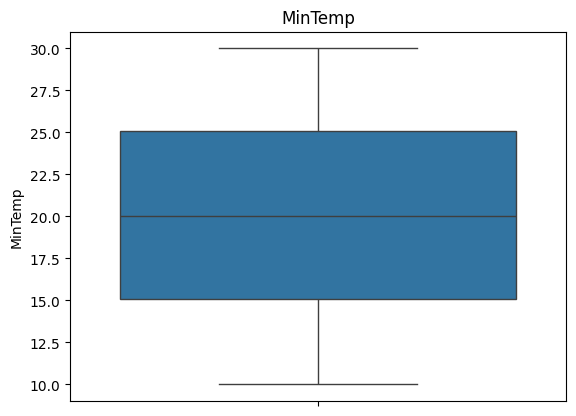

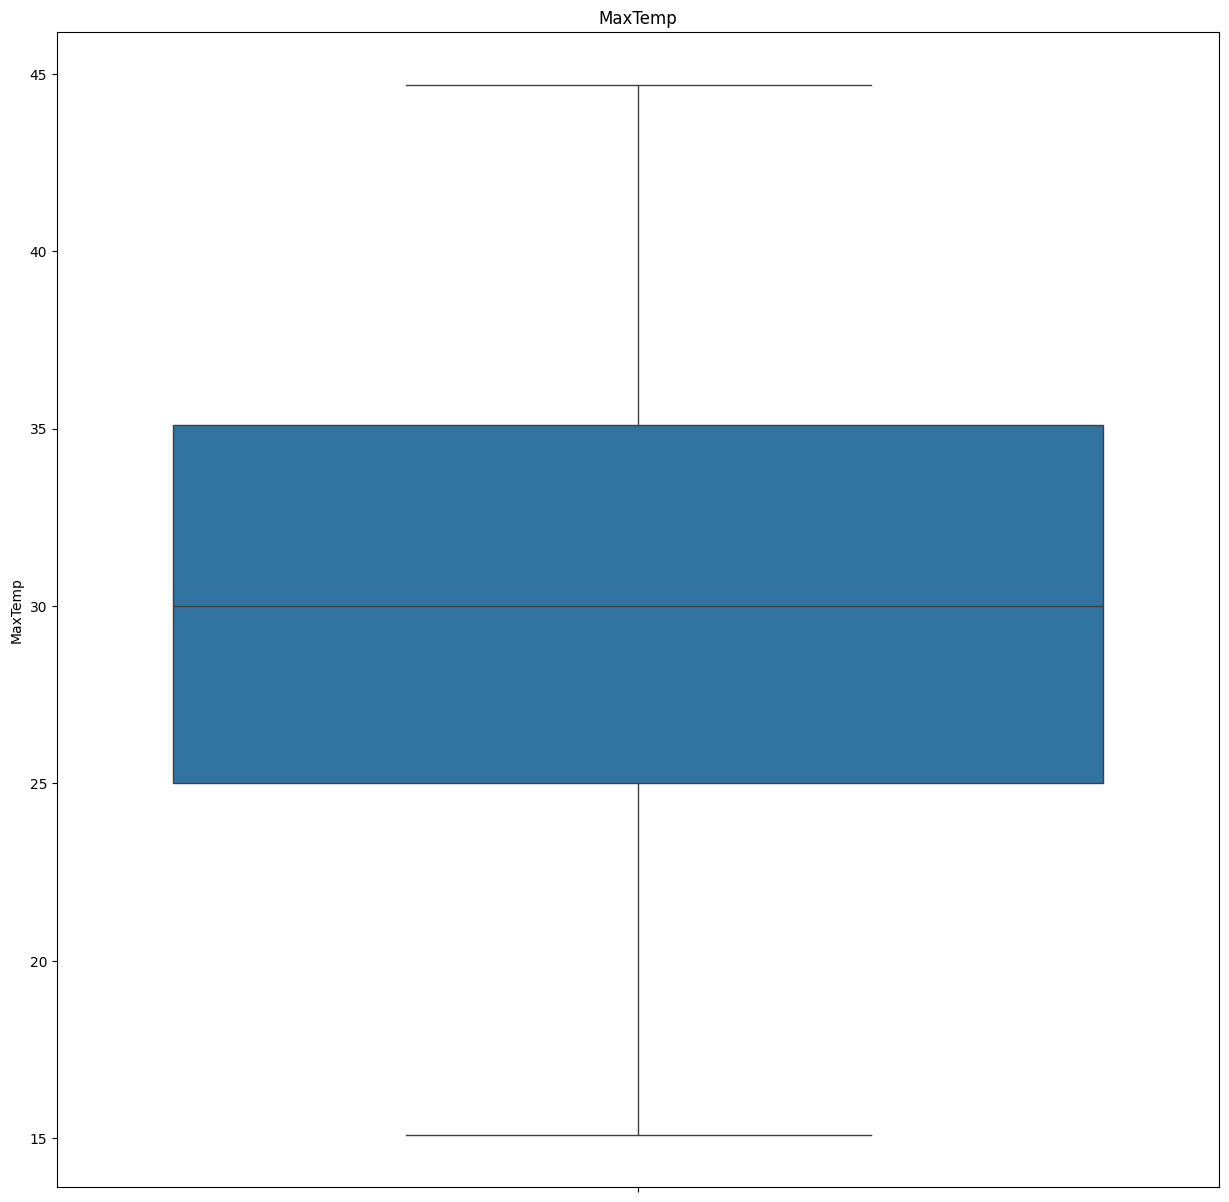

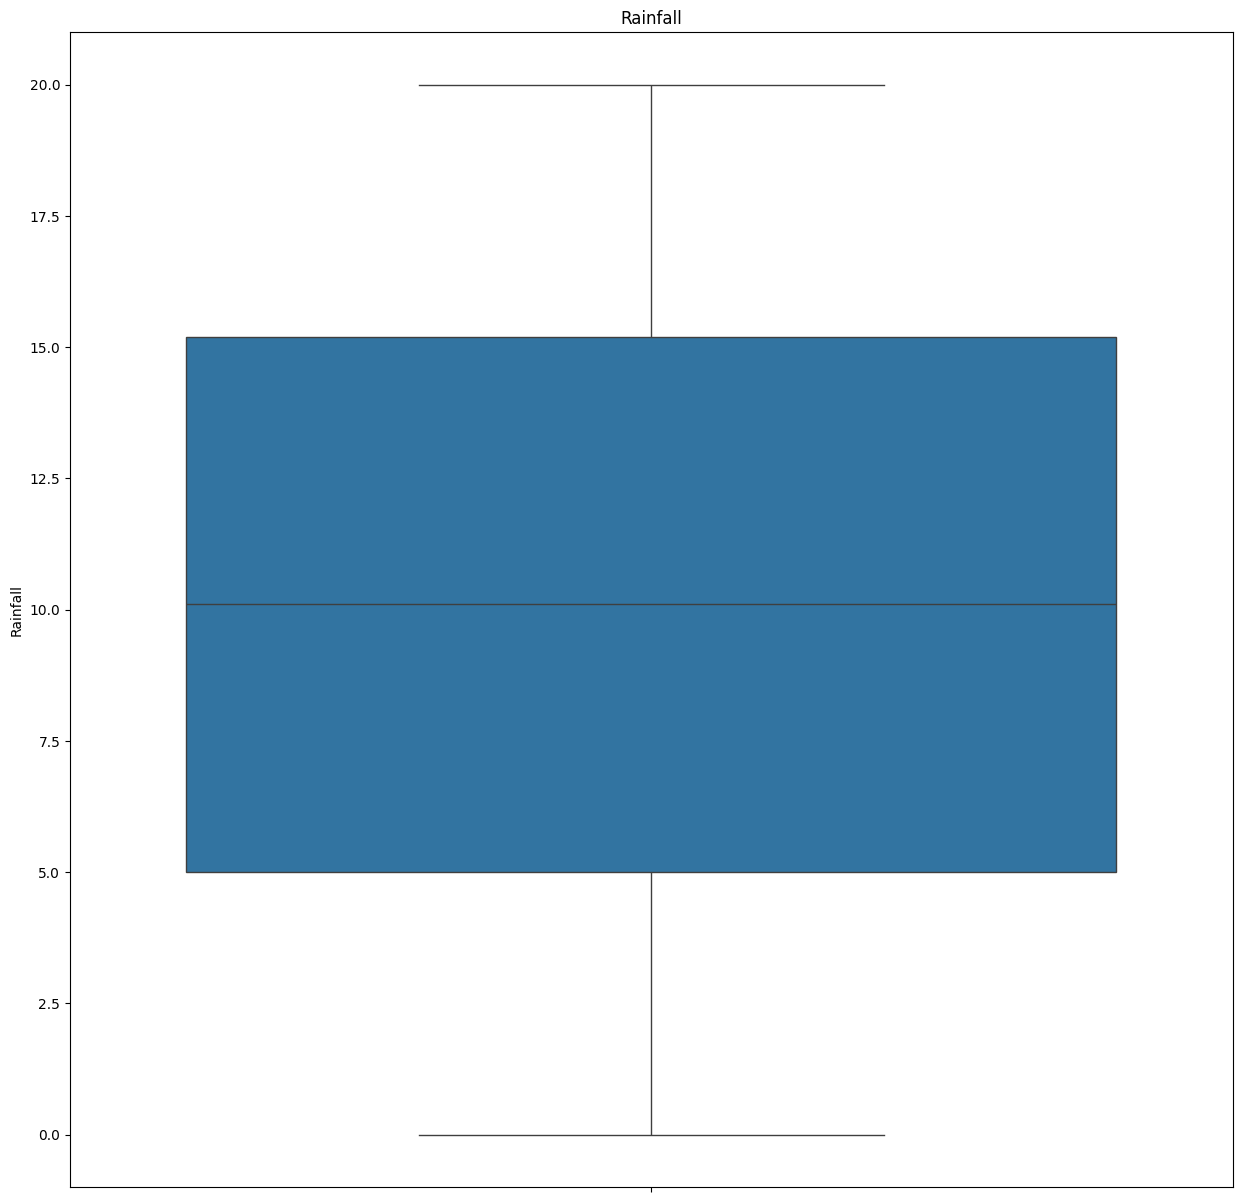

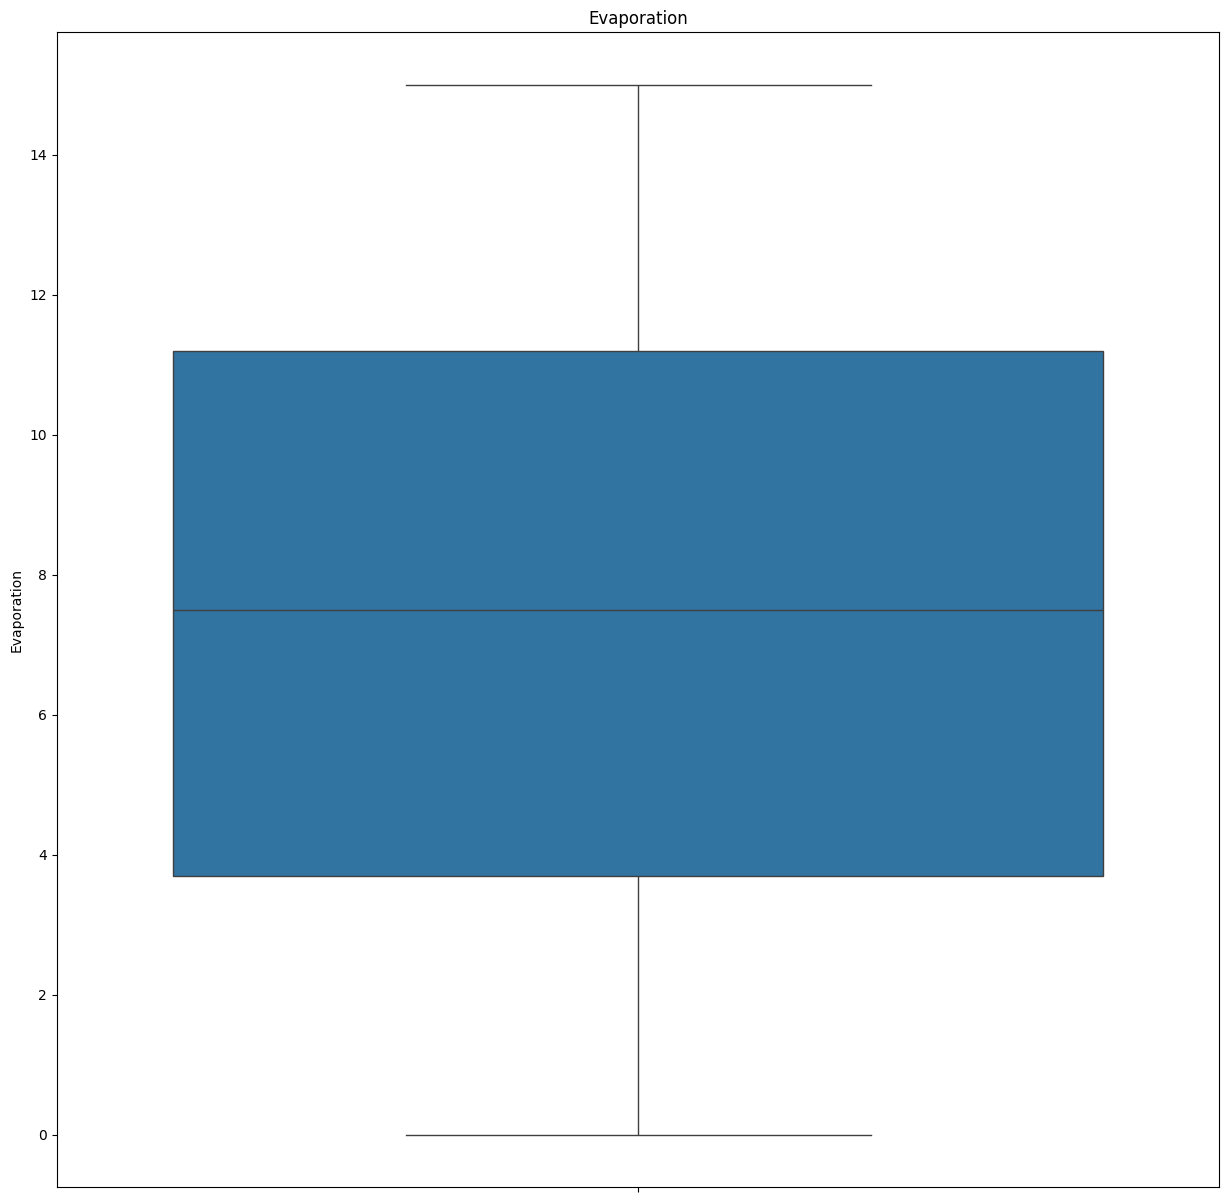

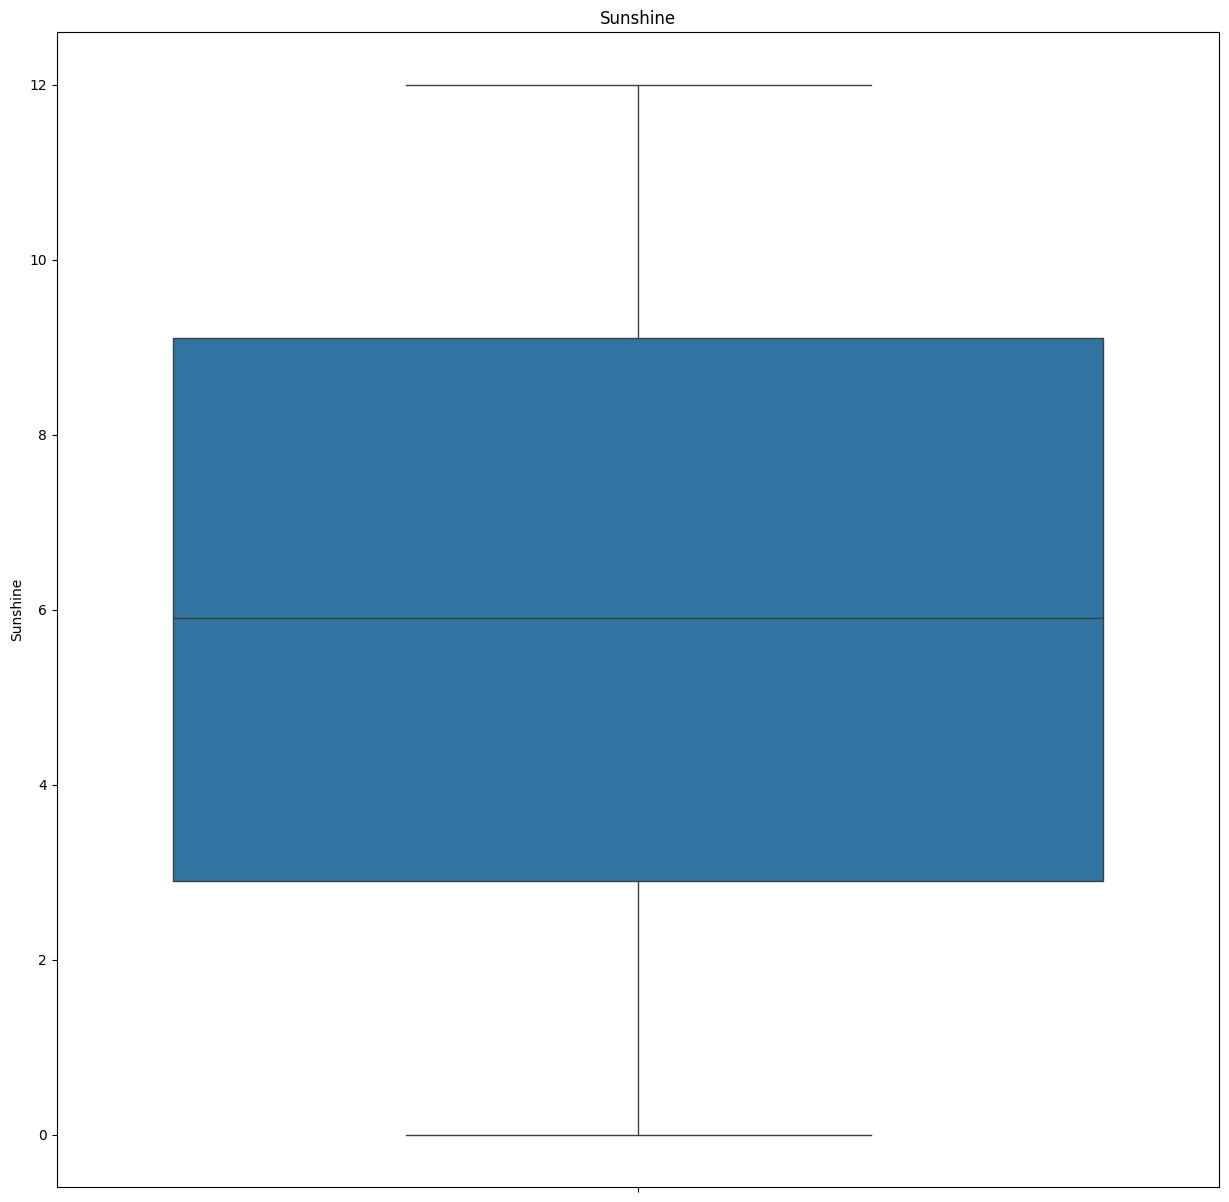

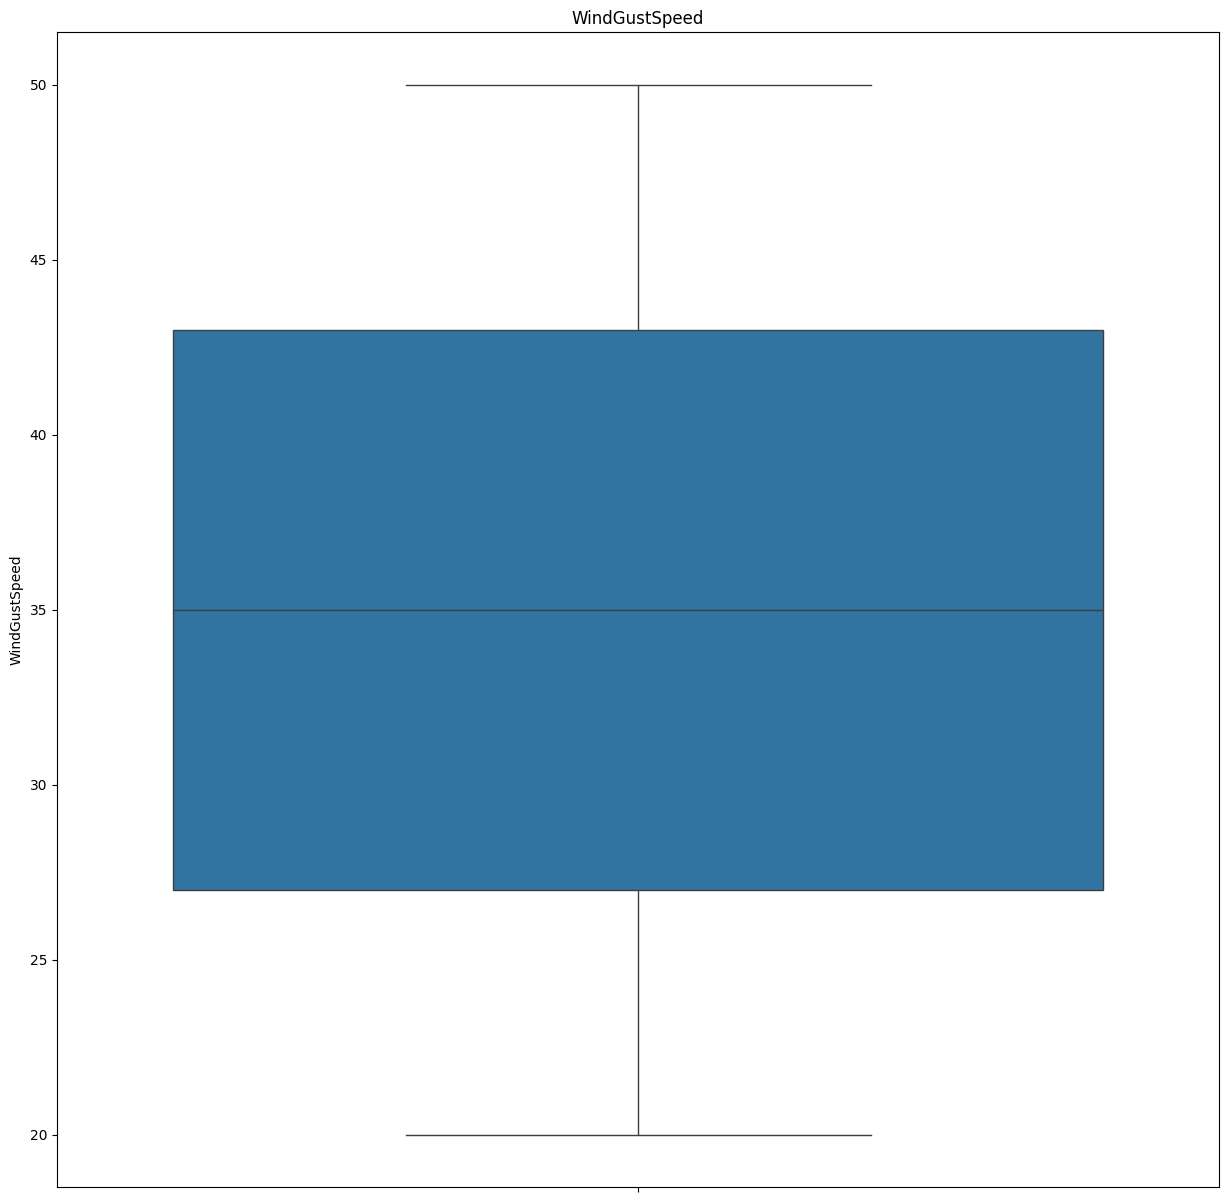

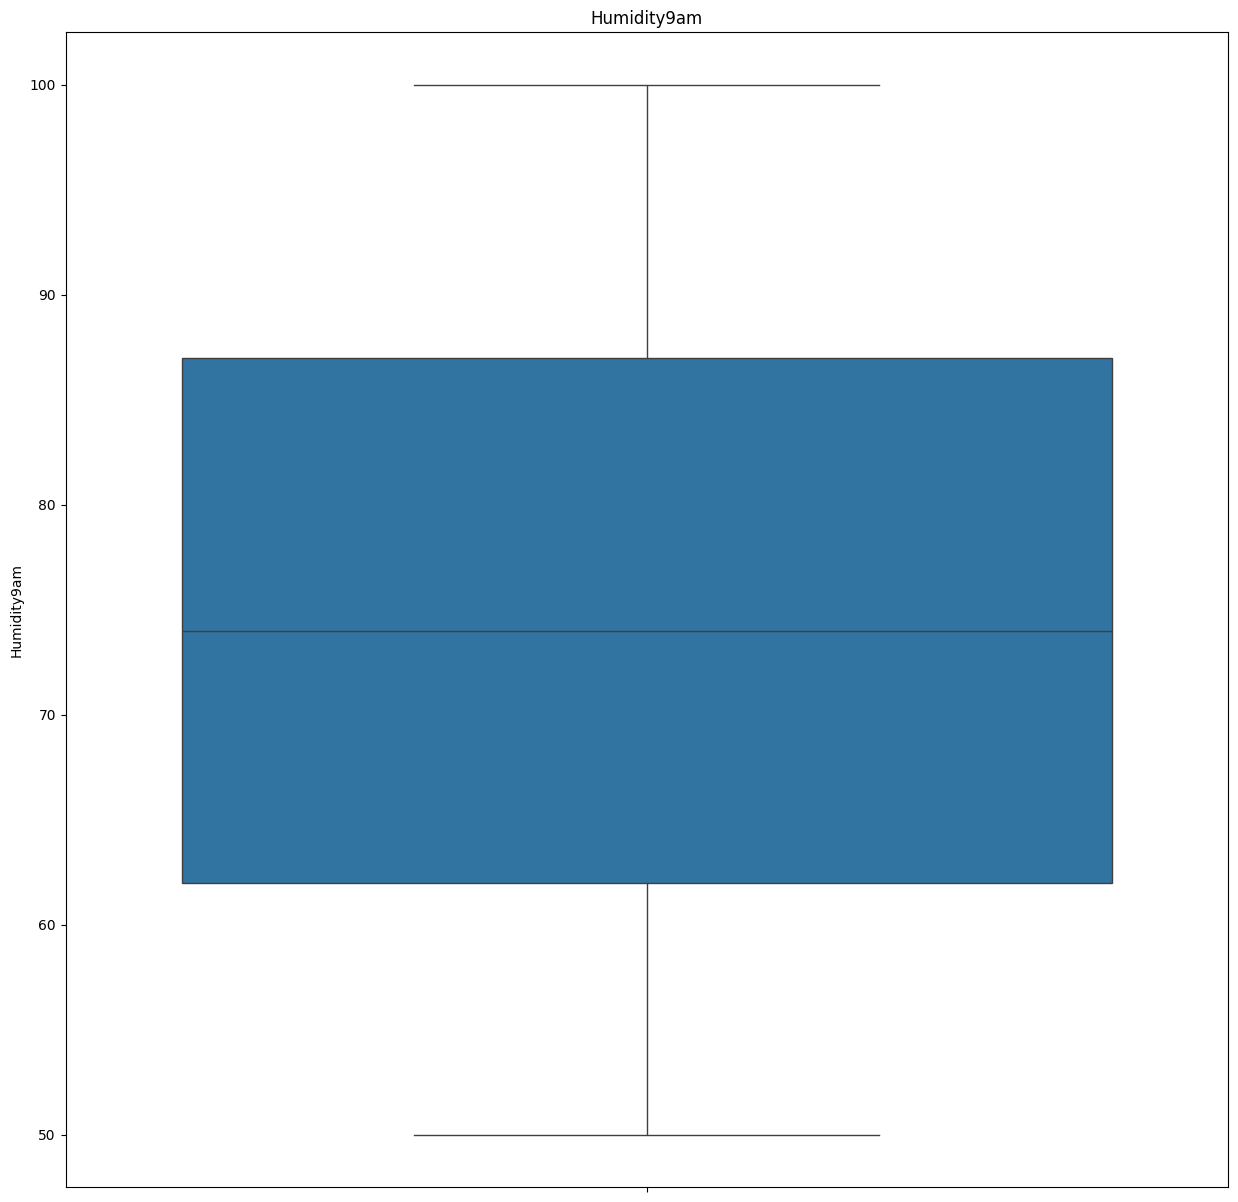

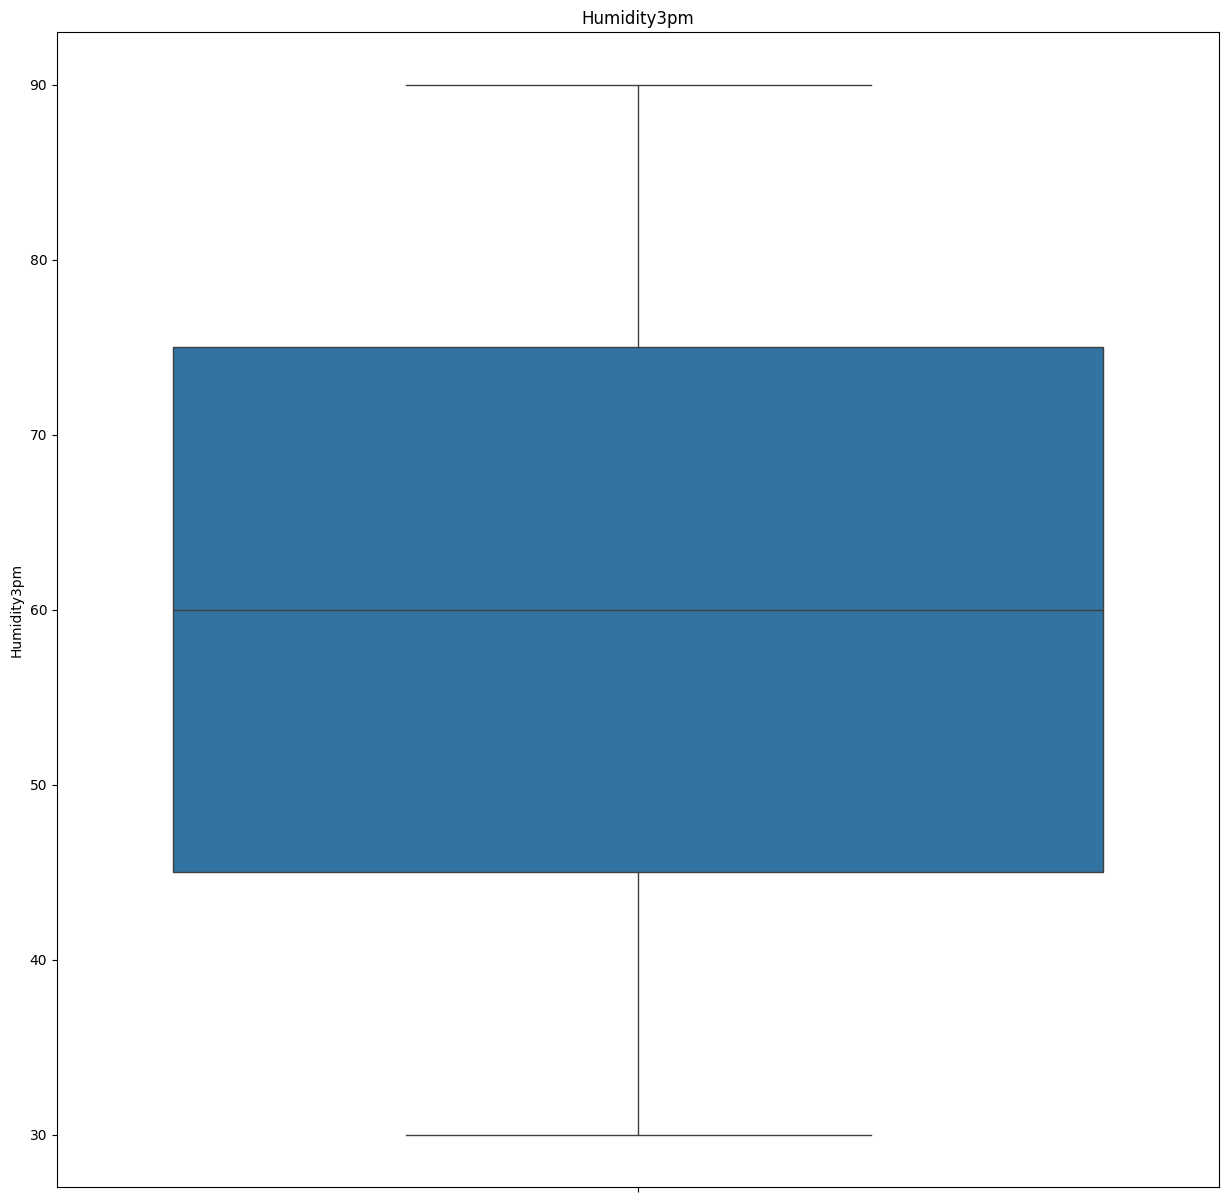

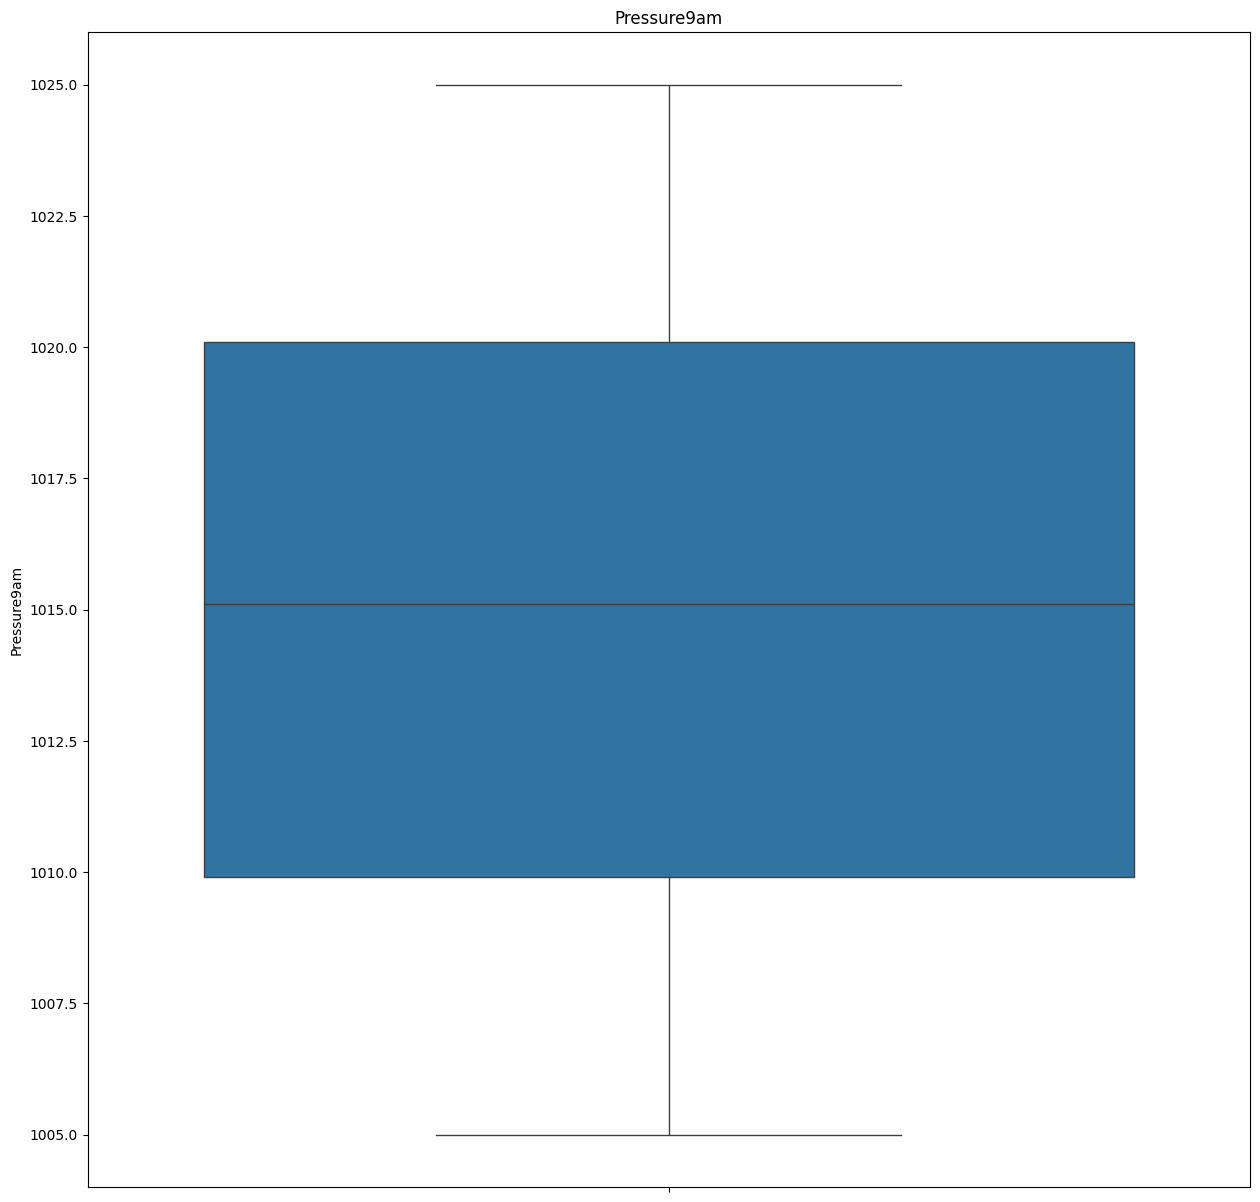

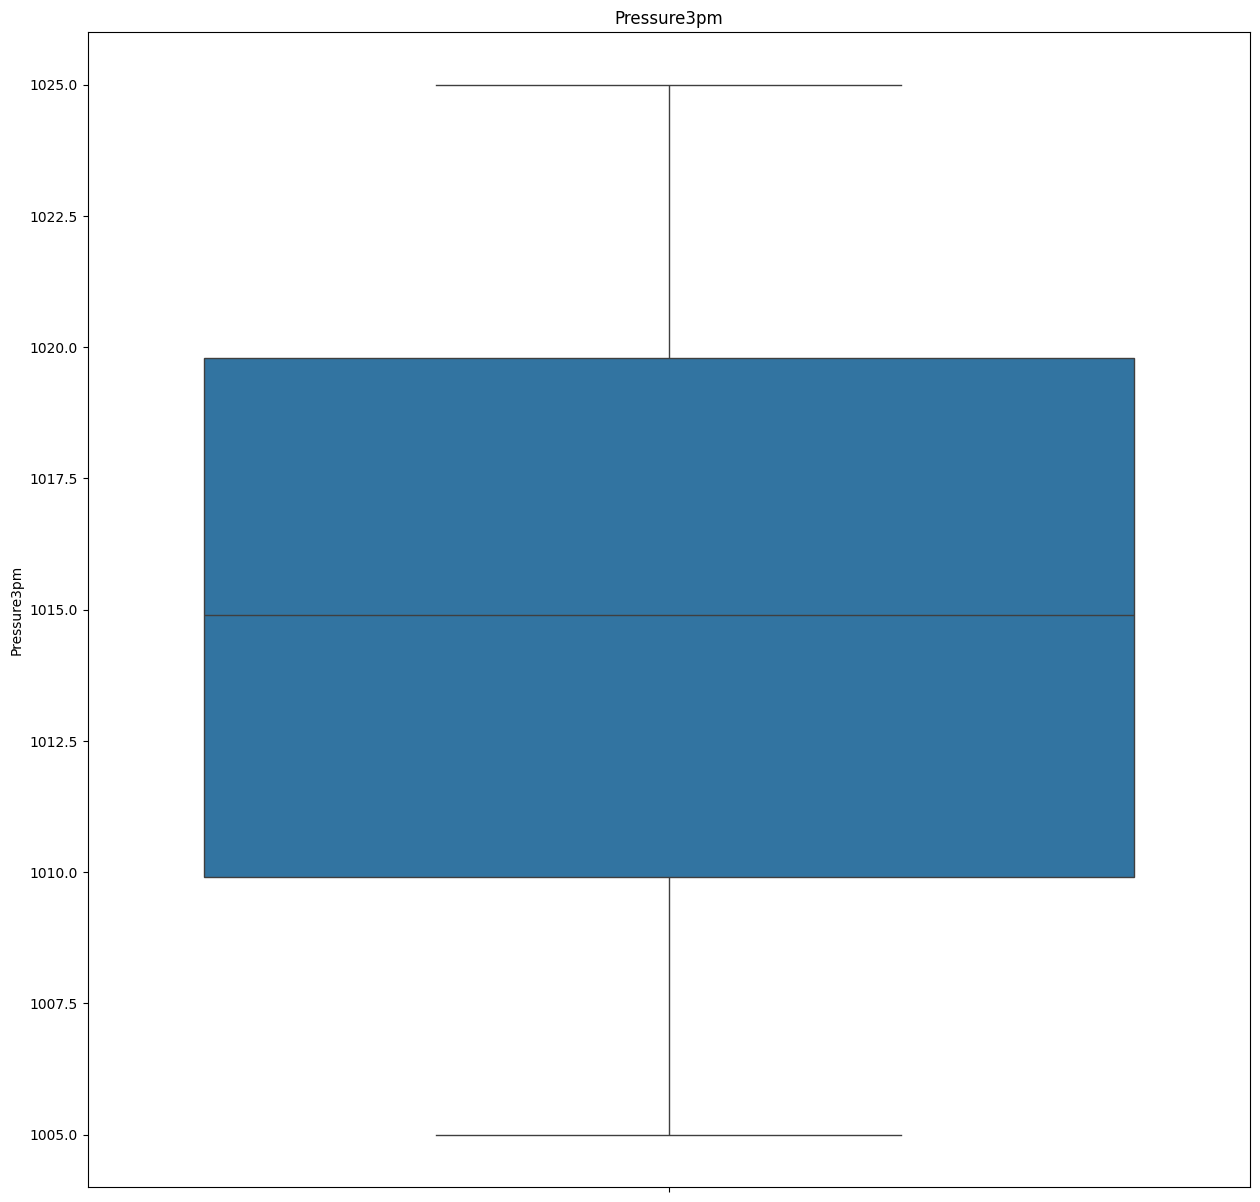

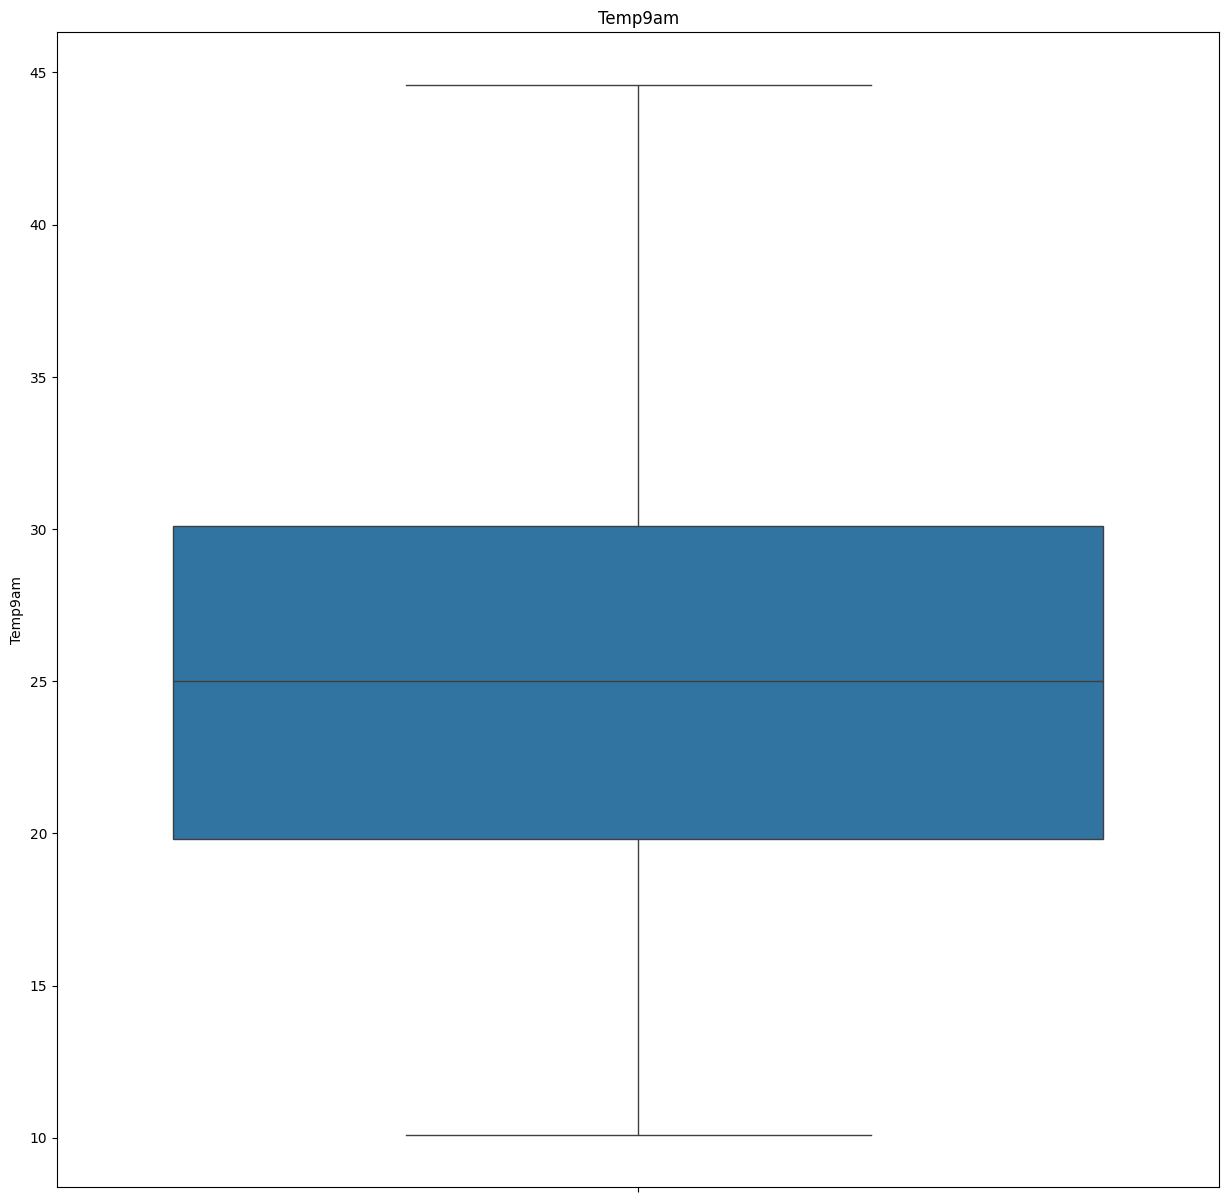

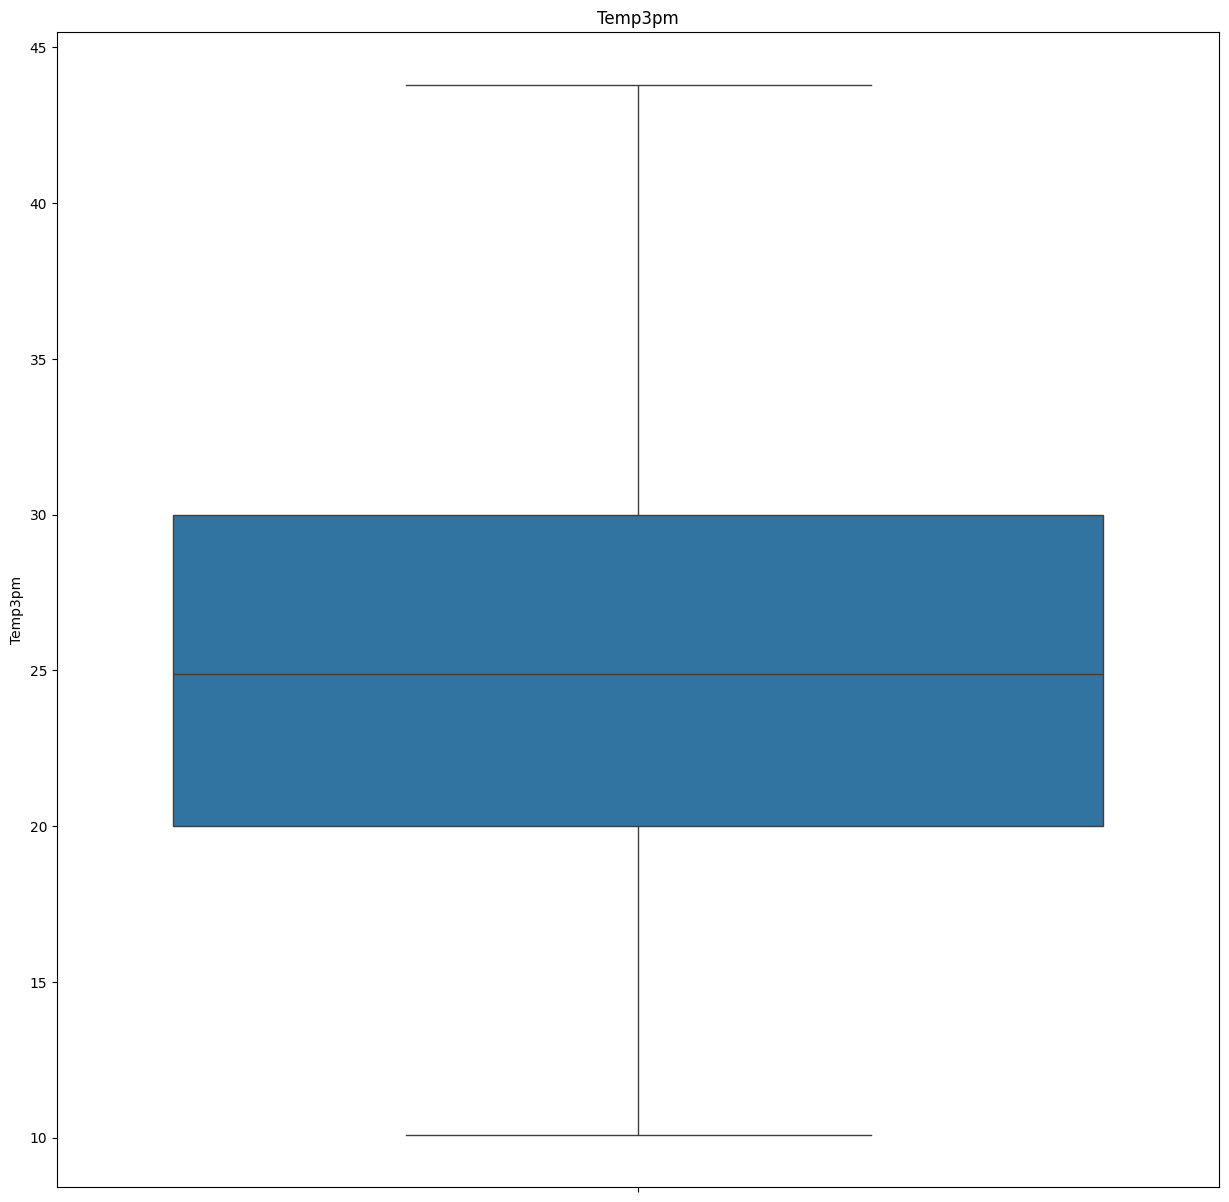

<Figure size 1500x1500 with 0 Axes>

In [169]:
# Outliers will be present in the continuous_feature
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

The approach employed in the paper to address outliers involves utilizing the interquartile range method.

In [170]:
# Let's look at the continuous features we have
continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [171]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

0.09999999999999609 40.10000000000001


In [172]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [173]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

9.849999999999998 50.25


In [174]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [175]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-10.299999999999999 30.5


In [176]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [177]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-7.549999999999998 22.449999999999996


In [178]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [179]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

3.0 67.0


In [180]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

C:\Users\divya\AppData\Local\Temp\ipykernel_15036\2333810097.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '68.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5


In [181]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.5 30.5


In [182]:

df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [183]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.5 30.5


In [184]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

C:\Users\divya\AppData\Local\Temp\ipykernel_15036\269339639.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5


In [185]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

24.5 124.5


In [186]:

df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [187]:

IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

994.5999999999999 1035.4


In [188]:

df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [189]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

995.05 1034.6499999999999


In [190]:

df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [191]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

4.35 45.550000000000004


In [192]:

df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [193]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

5.0 45.0


In [194]:

df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

let's look at the new boxplot

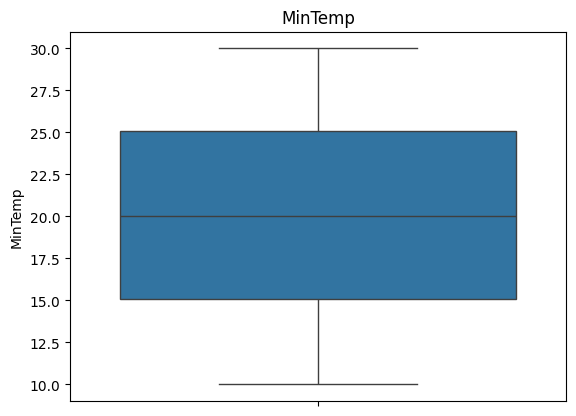

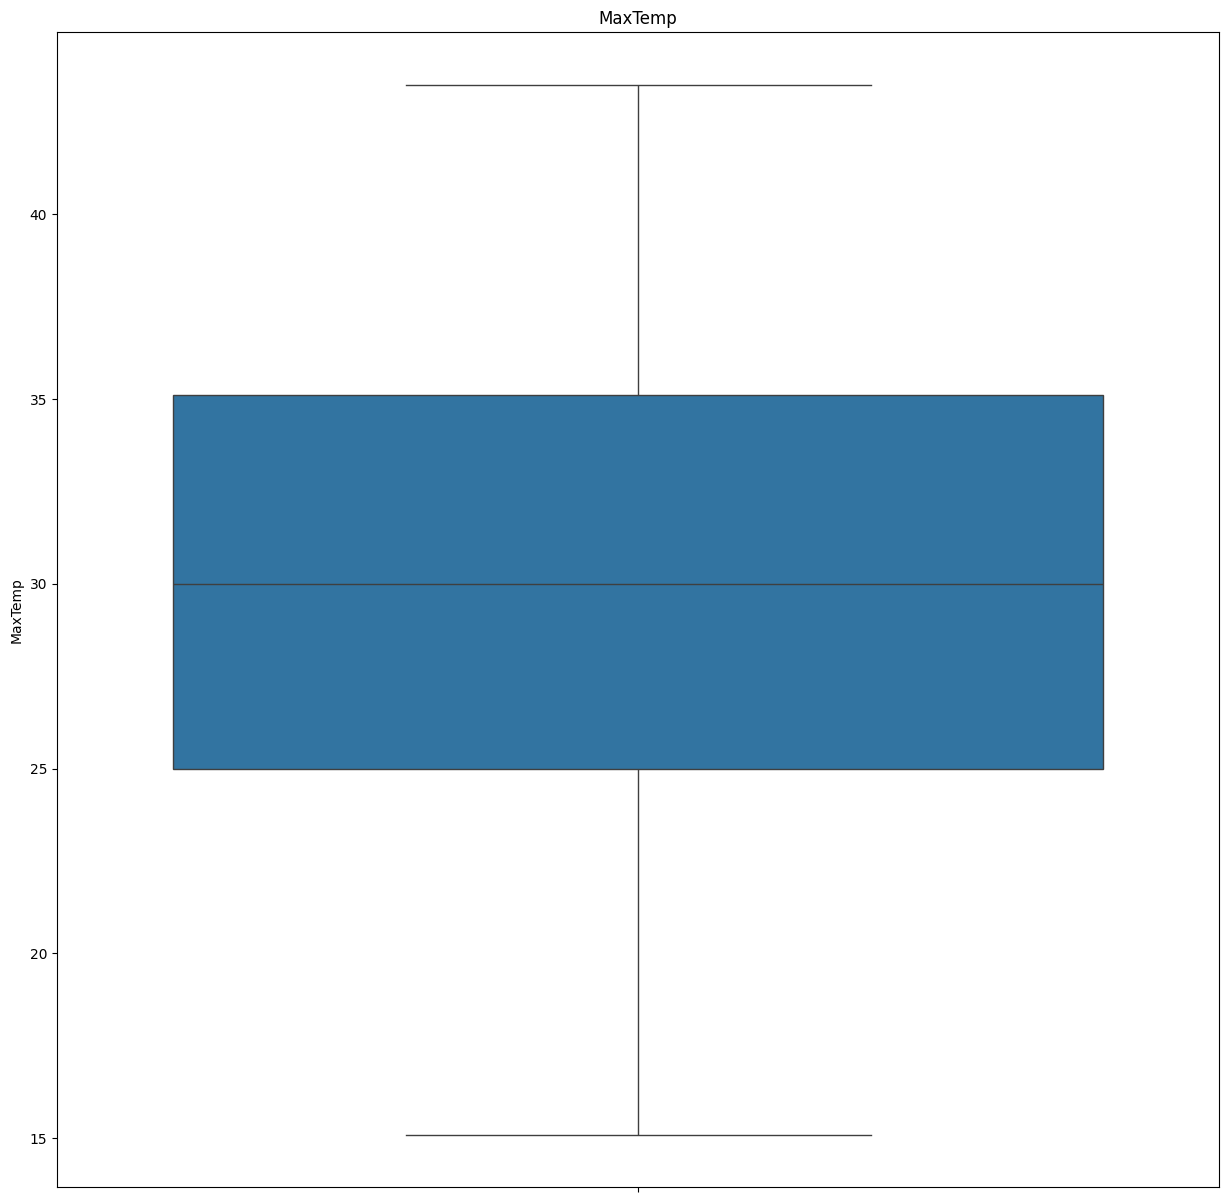

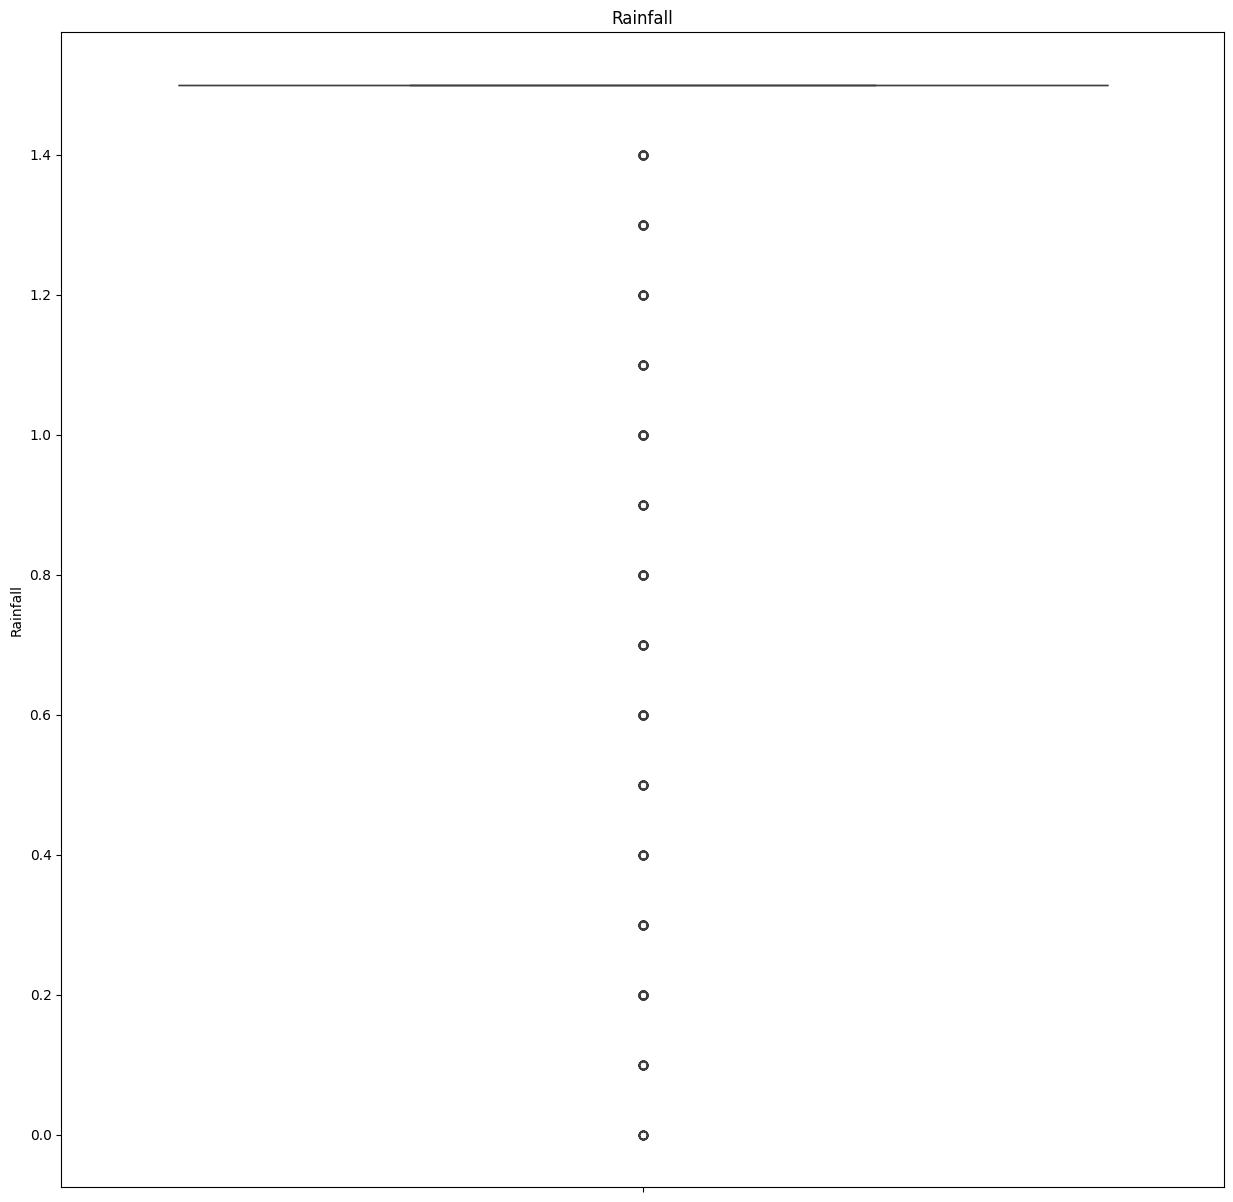

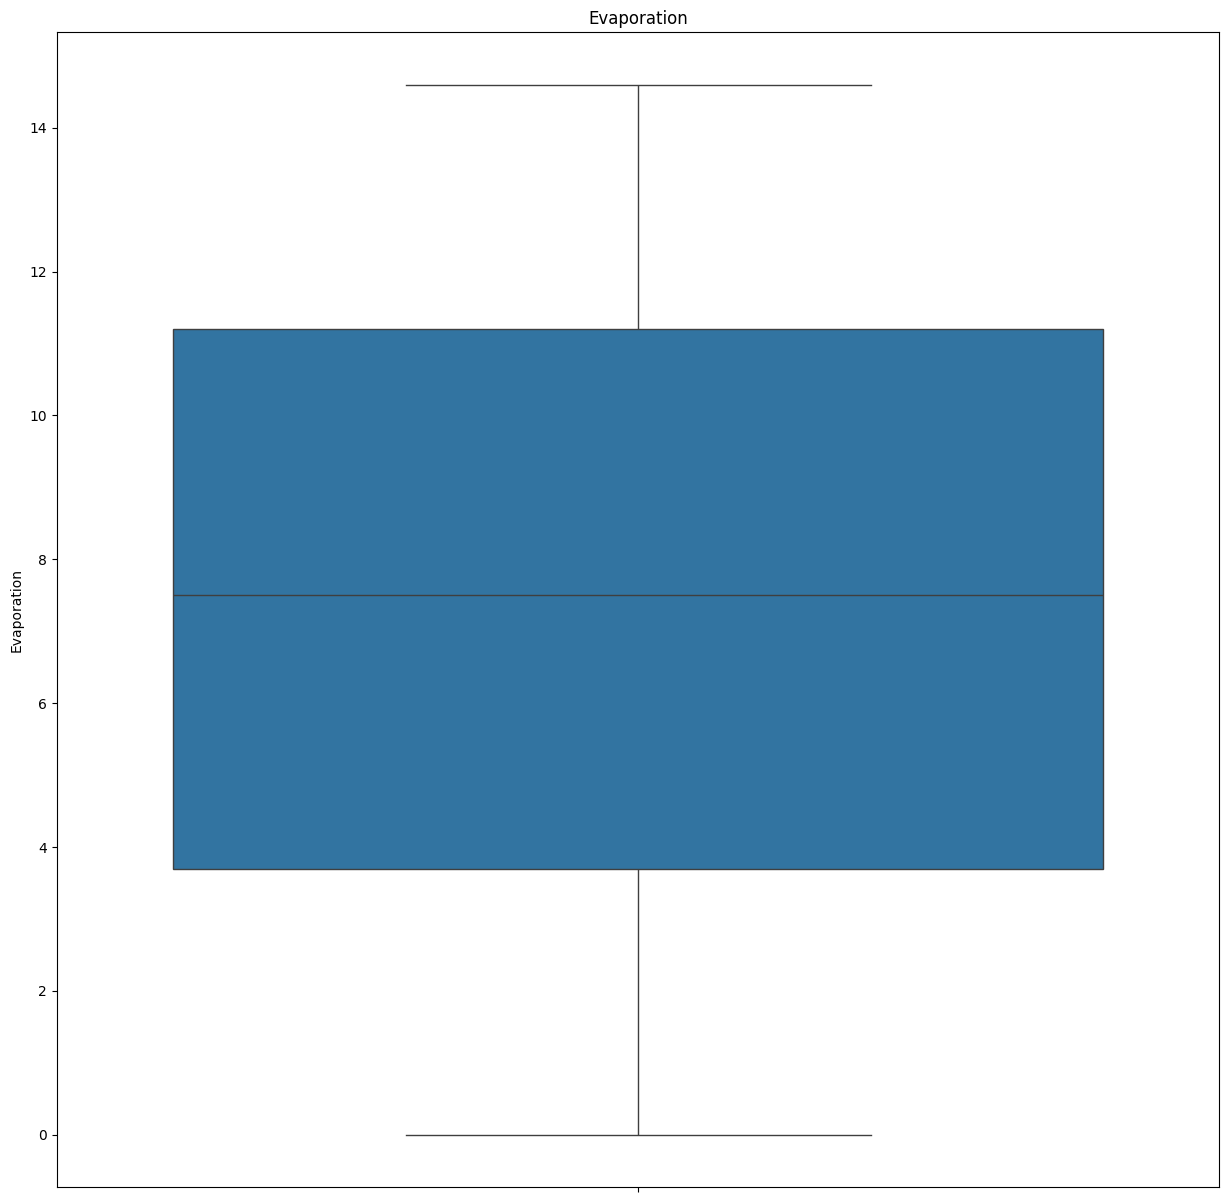

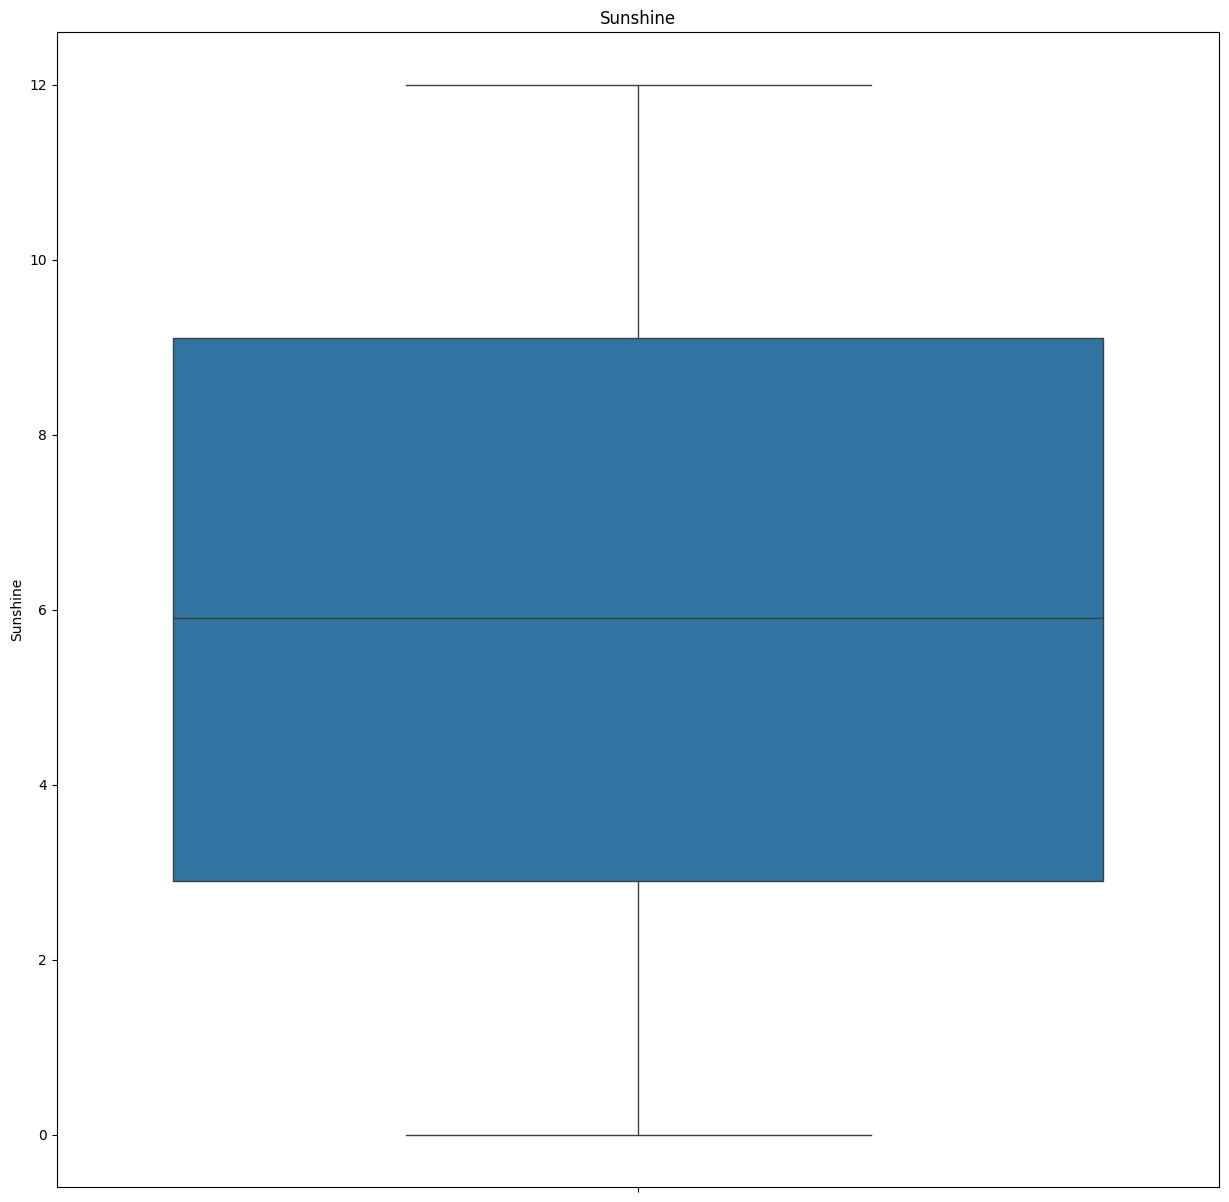

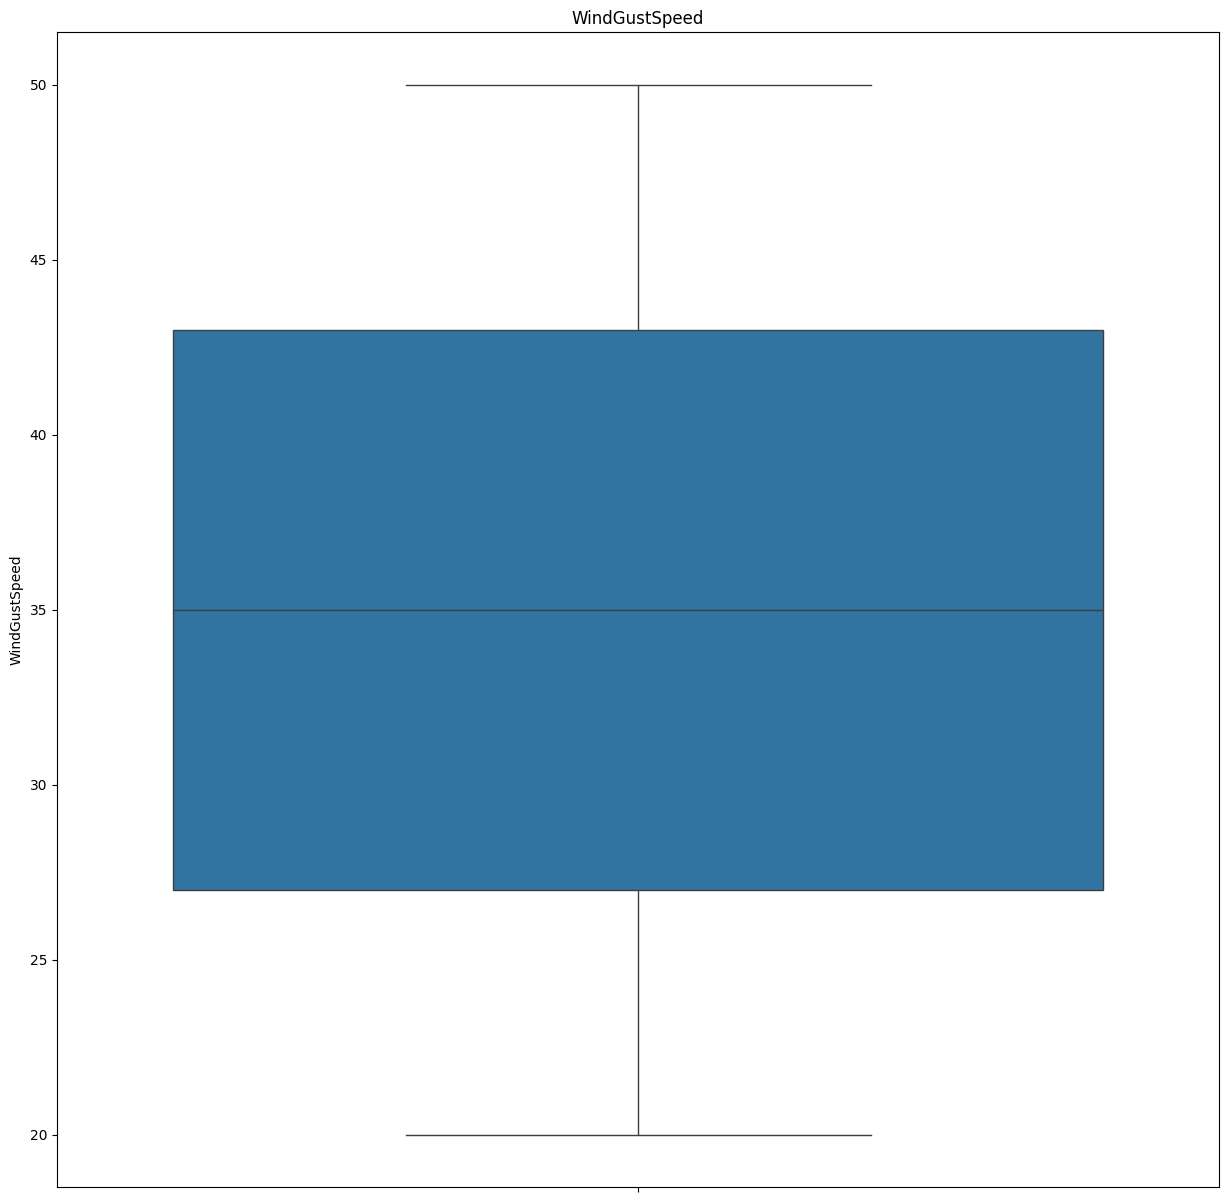

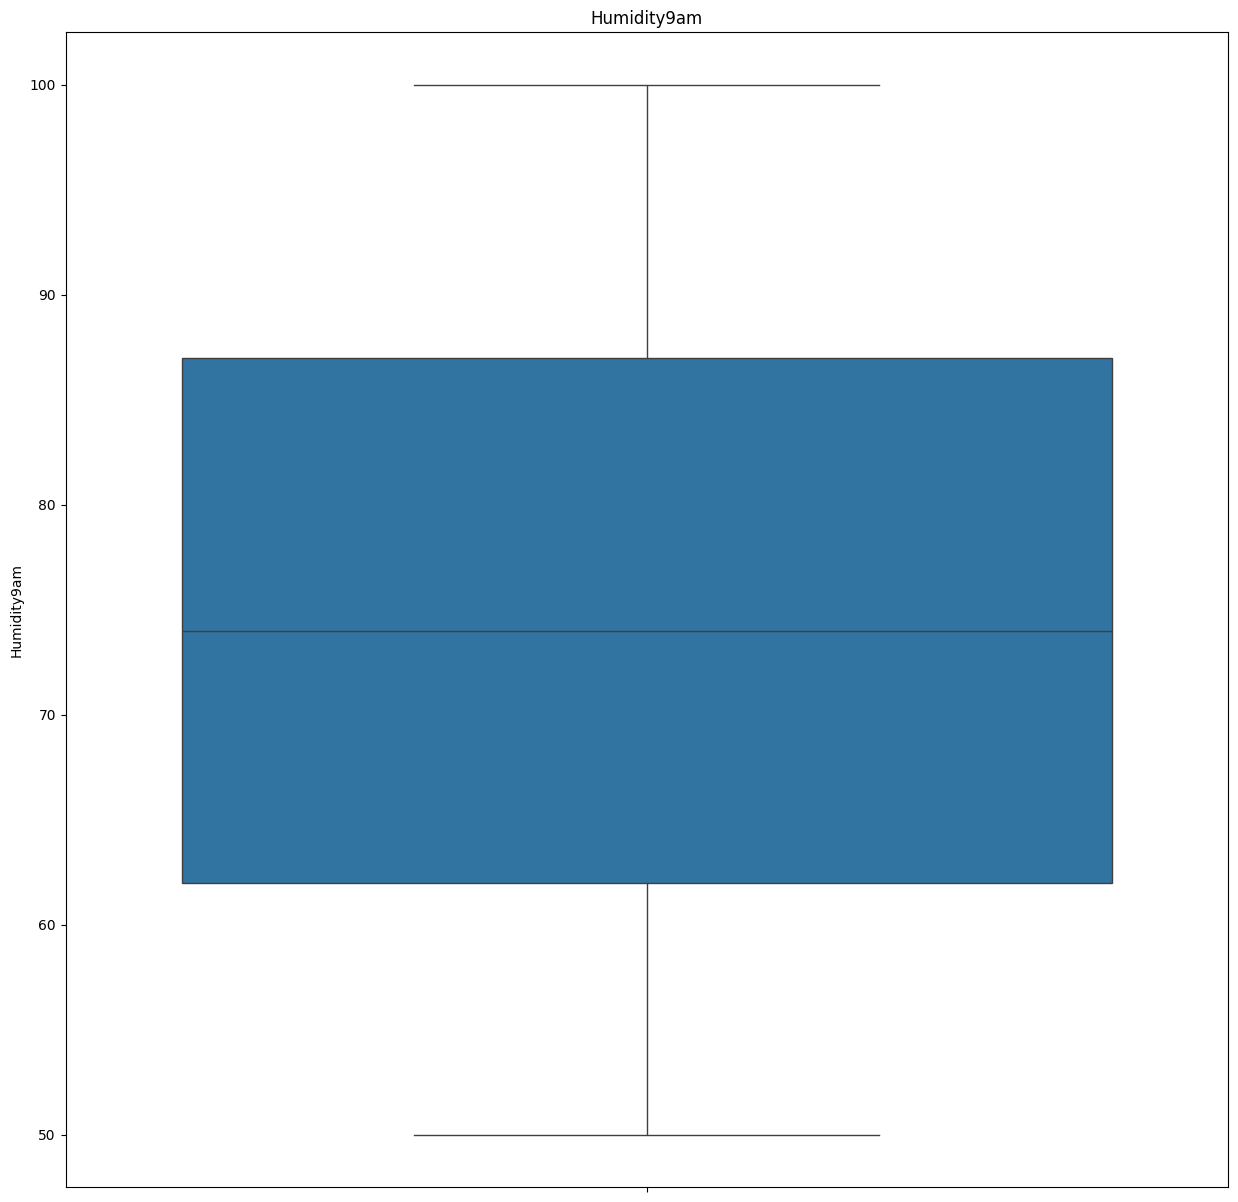

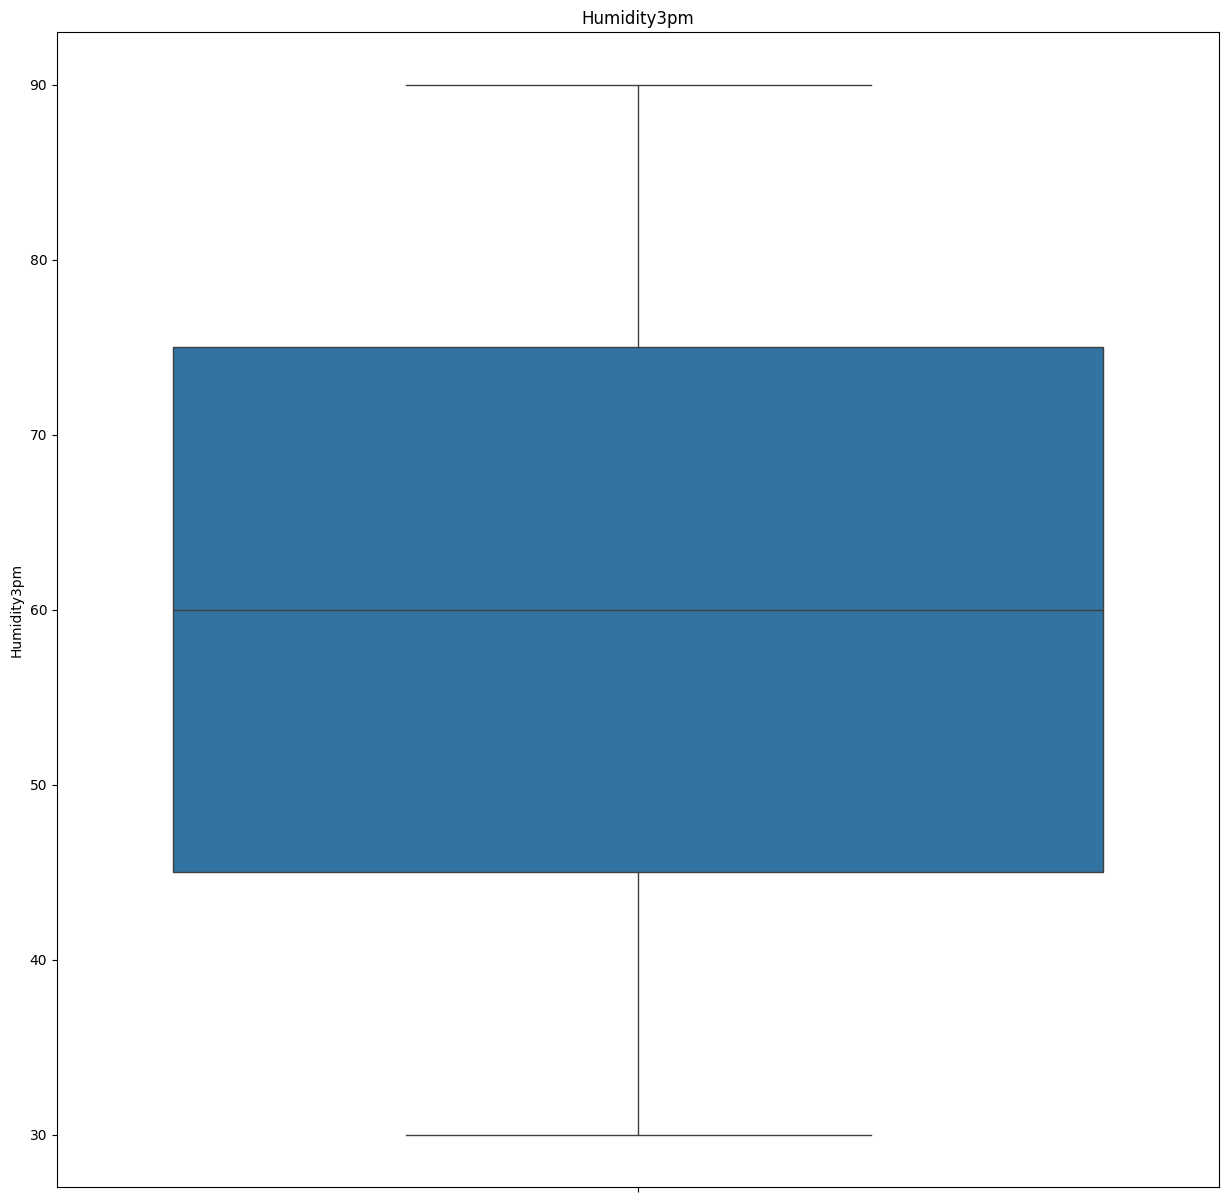

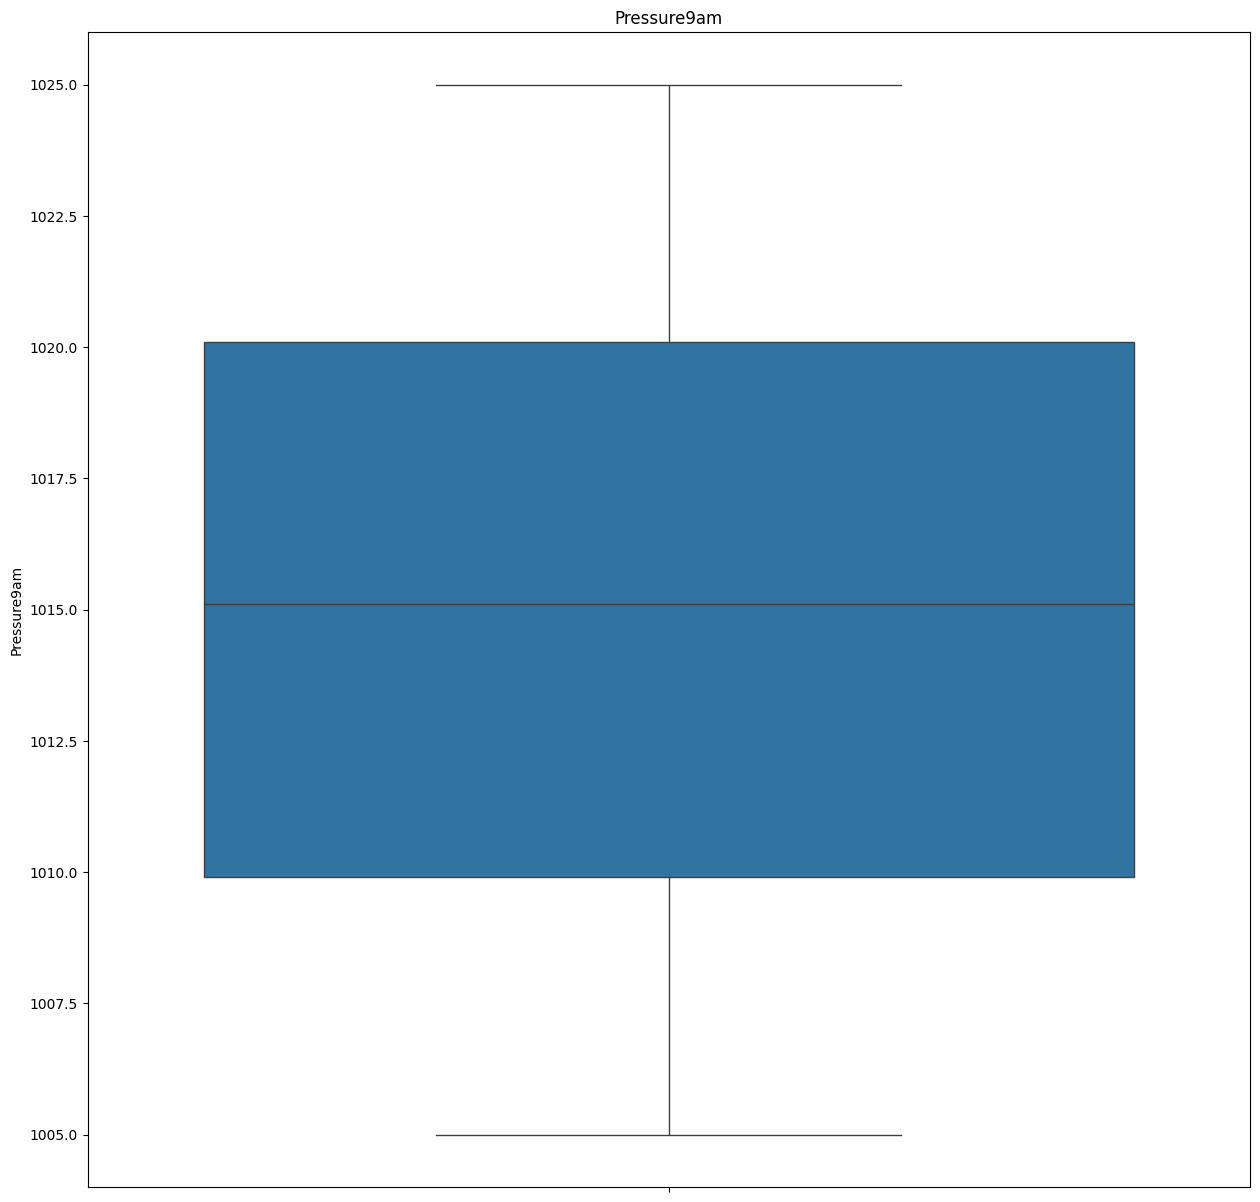

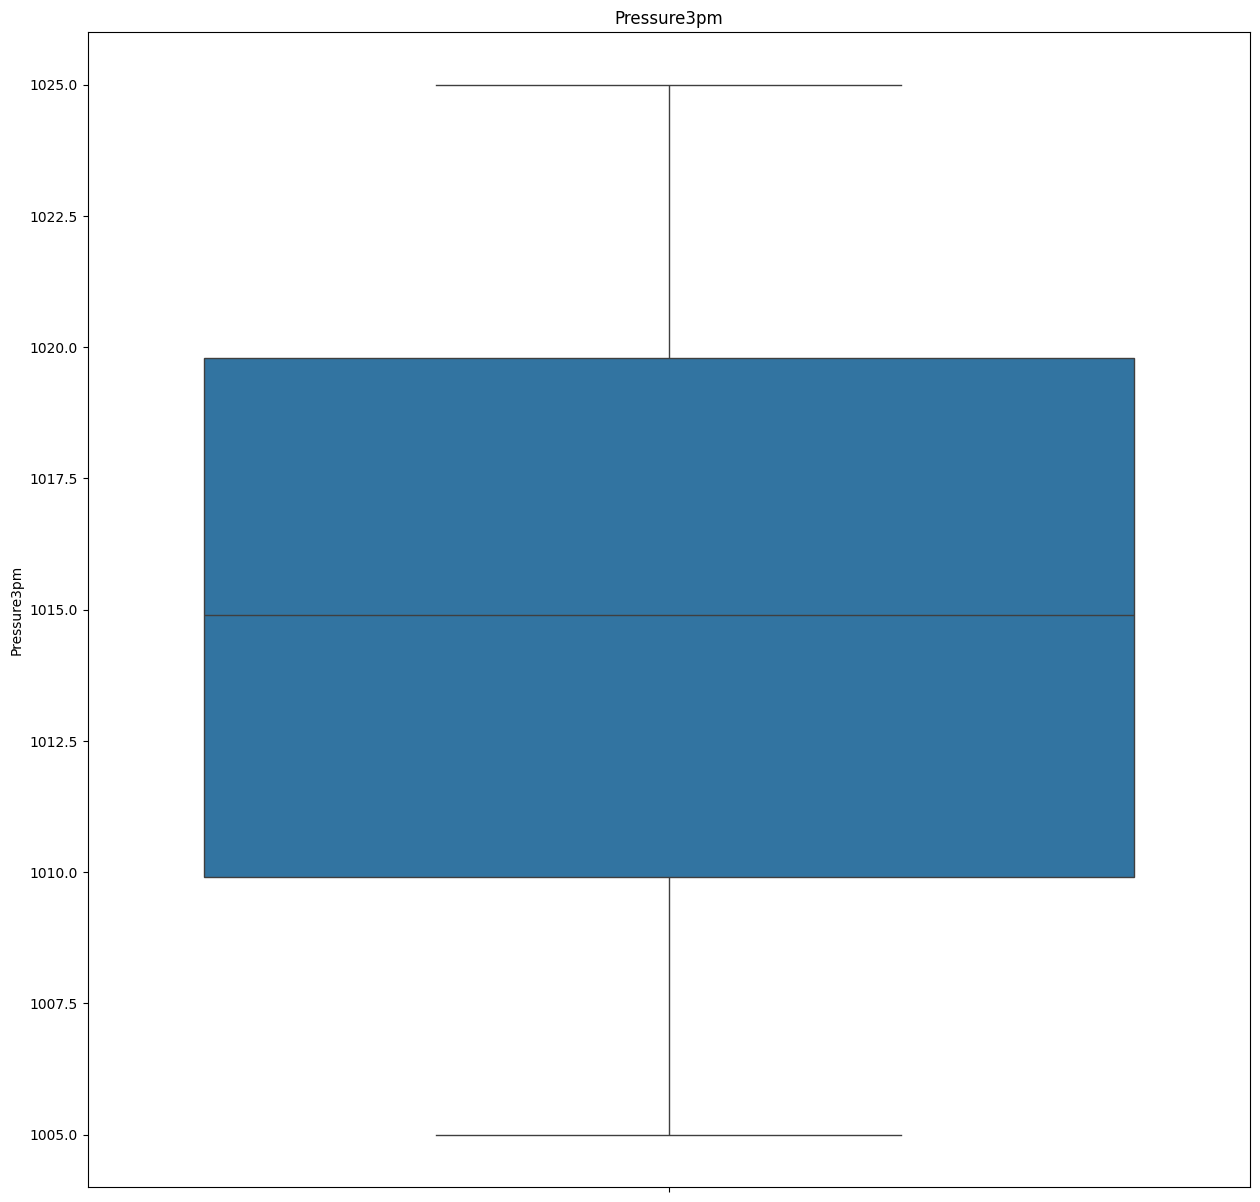

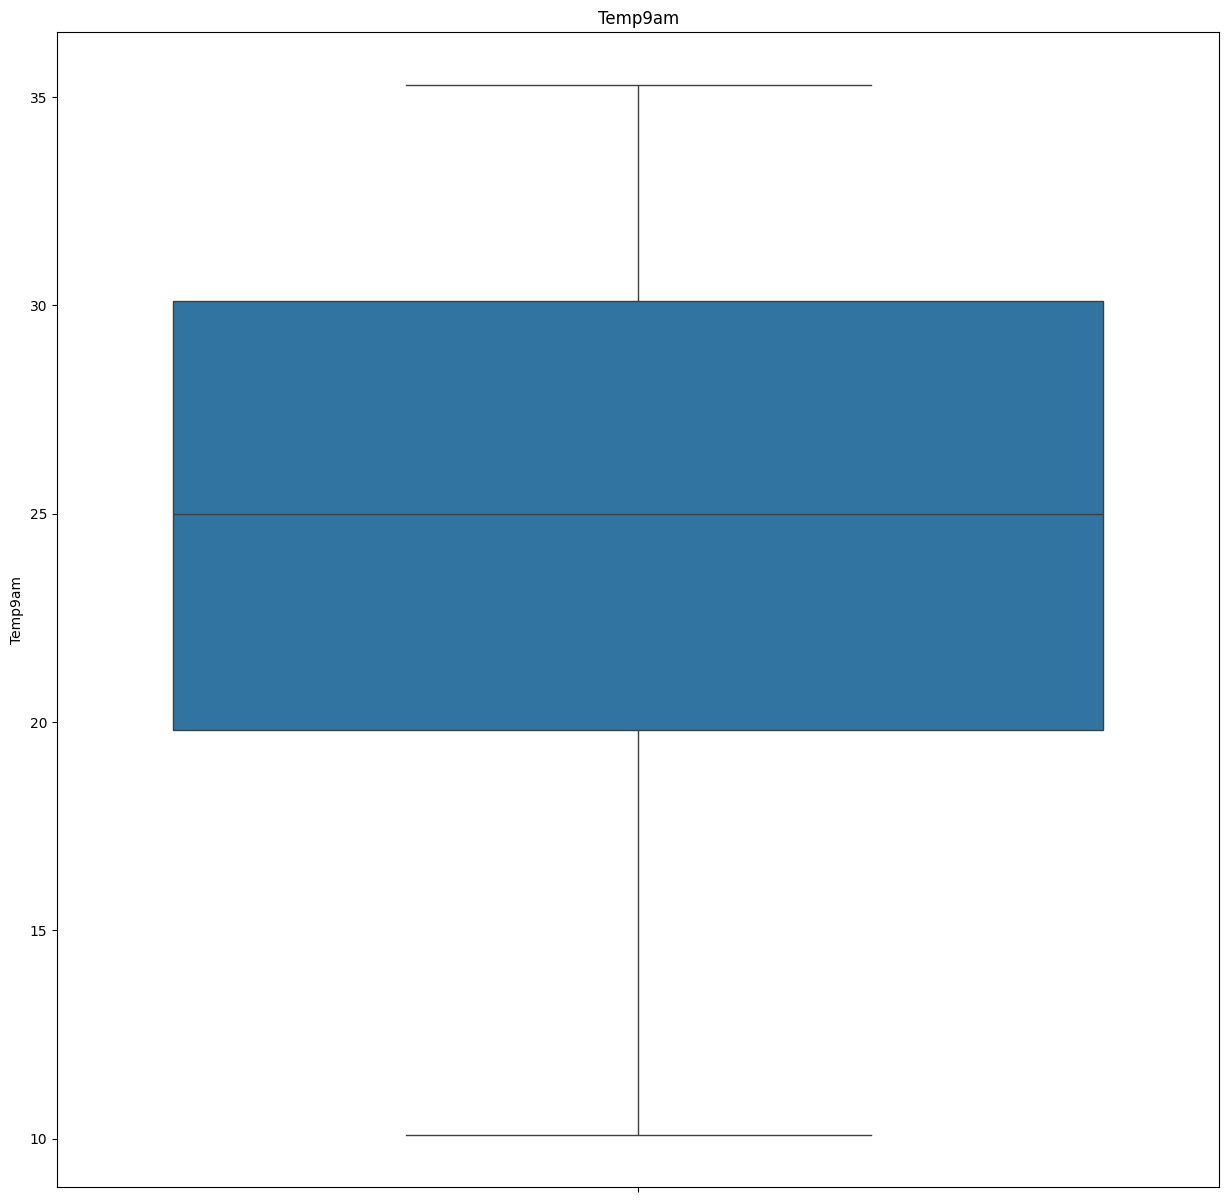

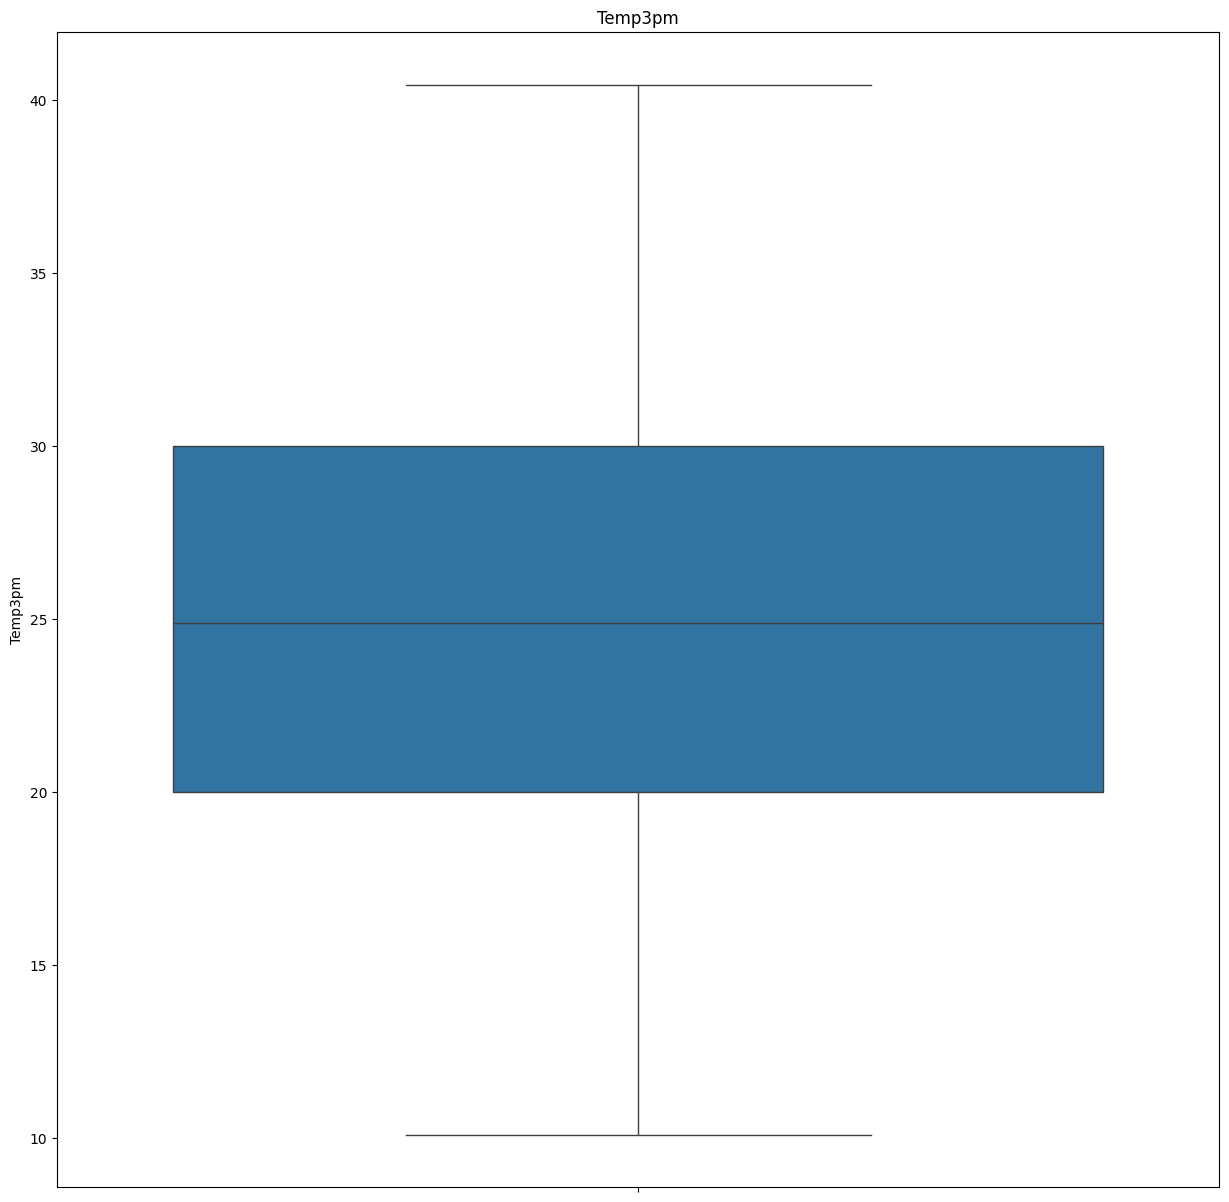

<Figure size 1500x1500 with 0 Axes>

In [195]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### Seems like we've dealt with all the outliers ###
<hr>

## Data Visualization
This section we will visualize the cleaned data, all the graphs are plotted according to the base paper.

#### An overall description of the Data ####

In [196]:
df.describe().transpose()

count         mean        std     min     25%     50%     75%  \
Location       8351.0     5.492636   2.879689     1.0     3.0     5.0     8.0   
MinTemp        8351.0    20.066399   5.745437    10.0    15.1    20.0    25.1   
MaxTemp        8351.0    30.039373   6.454936    15.1    25.0    30.0    35.1   
Rainfall       8351.0     1.444522   0.227837     0.0     1.5     1.5     1.5   
Evaporation    8351.0     7.452856   4.343170     0.0     3.7     7.5    11.2   
Sunshine       8351.0     5.951215   3.496549     0.0     2.9     5.9     9.1   
WindGustDir    8351.0     7.486169   4.620783     0.0     3.0     7.0    12.0   
WindGustSpeed  8351.0    34.941923   8.924345    20.0    27.0    35.0    43.0   
WindDir9am     8351.0     7.445575   4.636887     0.0     3.0     7.0    12.0   
WindDir3pm     8351.0     7.529757   4.619204     0.0     4.0     8.0    12.0   
WindSpeed9am   8351.0    12.470363   4.649131     5.0     8.0    12.0    17.0   
WindSpeed3pm   8351.0    12.528919   4.634223     5.0     8.0    13.0    17.0   
Humidity9am    8351.0    74.764579  14.649997    50.0    62.0    74.0    87.0   
Humidity3pm    8351.0    60.167046  17.609531    30.0    45.0    60.0    75.0   
Pressure9am    8351.0  1015.031721   5.810220  1005.0  1009.9  1015.1  1020.1   
Pressure3pm    8351.0  1014.885894   5.788462  1005.0  1009.9  1014.9  1019.8   
Cloud9am       8351.0     3.970782   2.569346     0.0     2.0     4.0     6.0   
Cloud3pm       8351.0     4.020956   2.572571     0.0     2.0     4.0     6.0   
Temp9am        8351.0    24.893234   6.378362    10.1    19.8    25.0    30.1   
Temp3pm        8351.0    25.030823   6.643144    10.1    20.0    24.9    30.0   
Date_month     8351.0     6.461023   3.448944     1.0     3.0     6.0     9.0   

                   max  
Location         10.00  
MinTemp          30.00  
MaxTemp          43.50  
Rainfall          1.50  
Evaporation      14.60  
Sunshine         12.00  
WindGustDir      15.00  
WindGustSpeed    50.00  
WindDir9am       15.00  
WindDir3pm       15.00  
WindSpeed9am     20.00  
WindSpeed3pm     20.00  
Humidity9am     100.00  
Humidity3pm      90.00  
Pressure9am    1025.00  
Pressure3pm    1025.00  
Cloud9am          8.00  
Cloud3pm          8.00  
Temp9am          35.30  
Temp3pm          40.45  
Date_month       12.00

#### Probability and Histogram Plot ####
Histogram is used to display the frequency or count of values within different bins or intervals.<br>
probability plot compares the quantiles of the observed data with the quantiles of a theoretical distribution.

In [197]:
import scipy.stats as stats

MinTemp


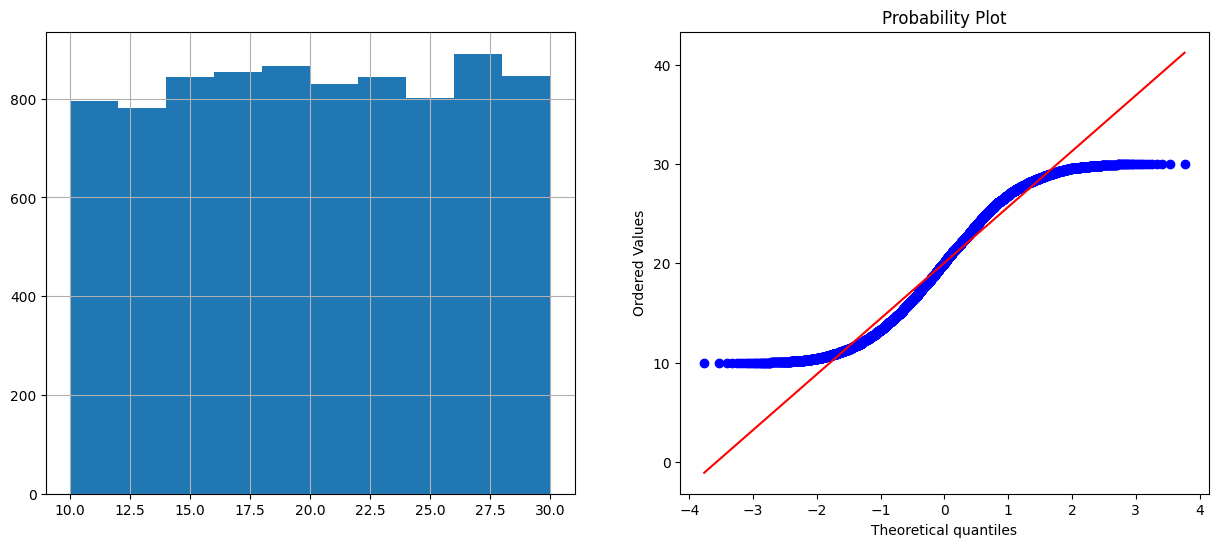

MaxTemp


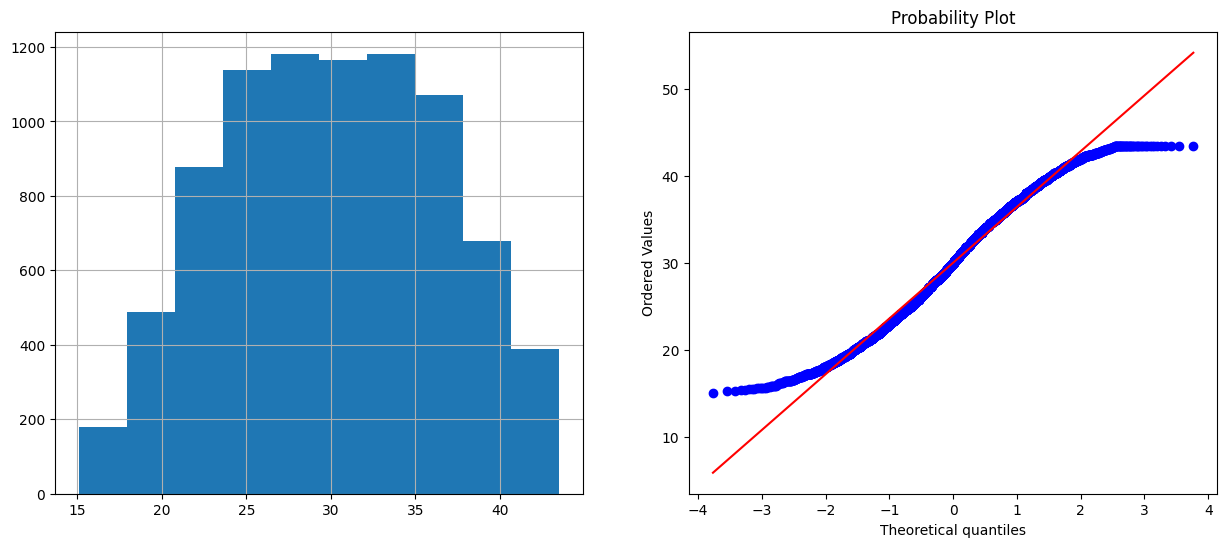

Rainfall


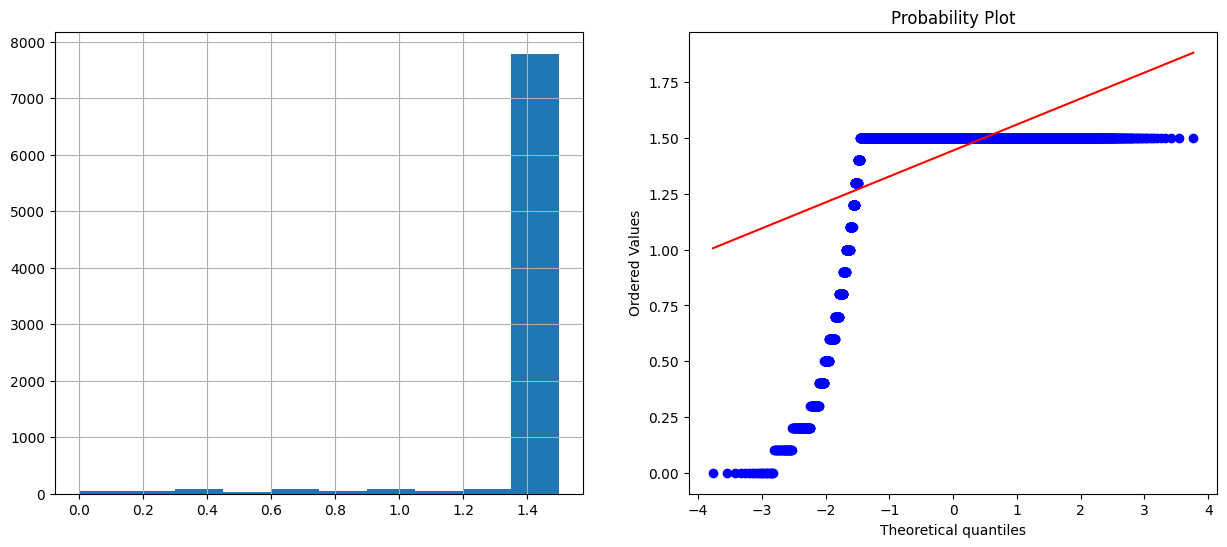

Evaporation


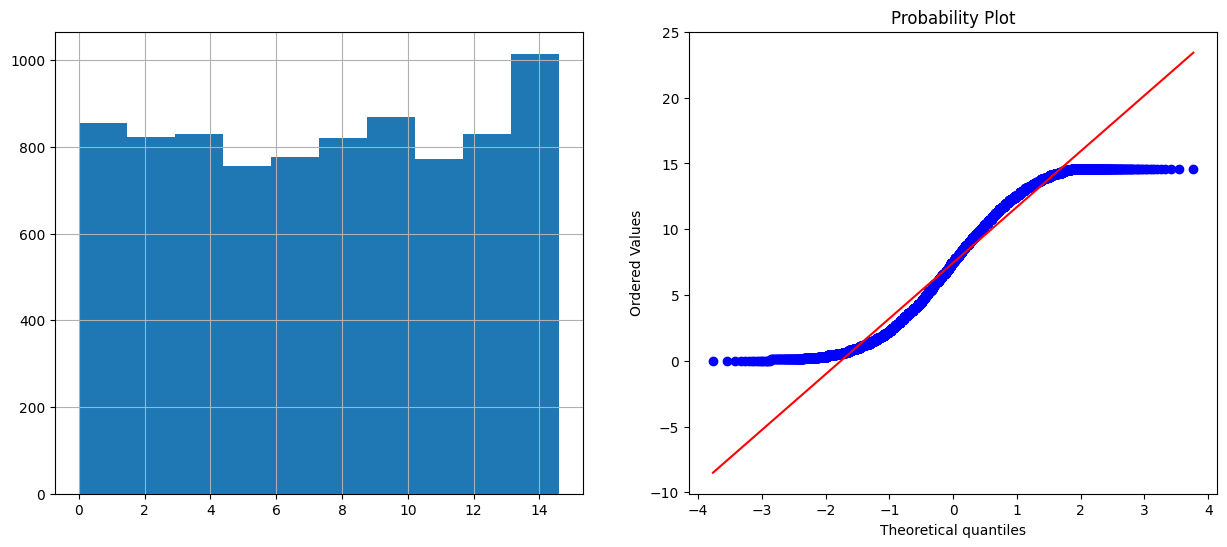

Sunshine


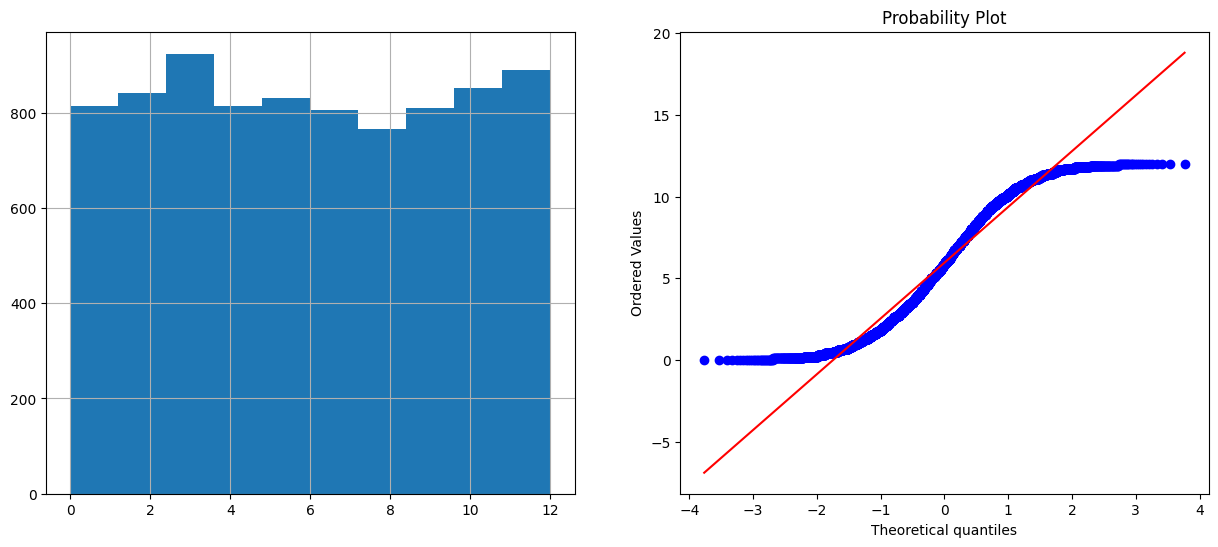

WindGustSpeed


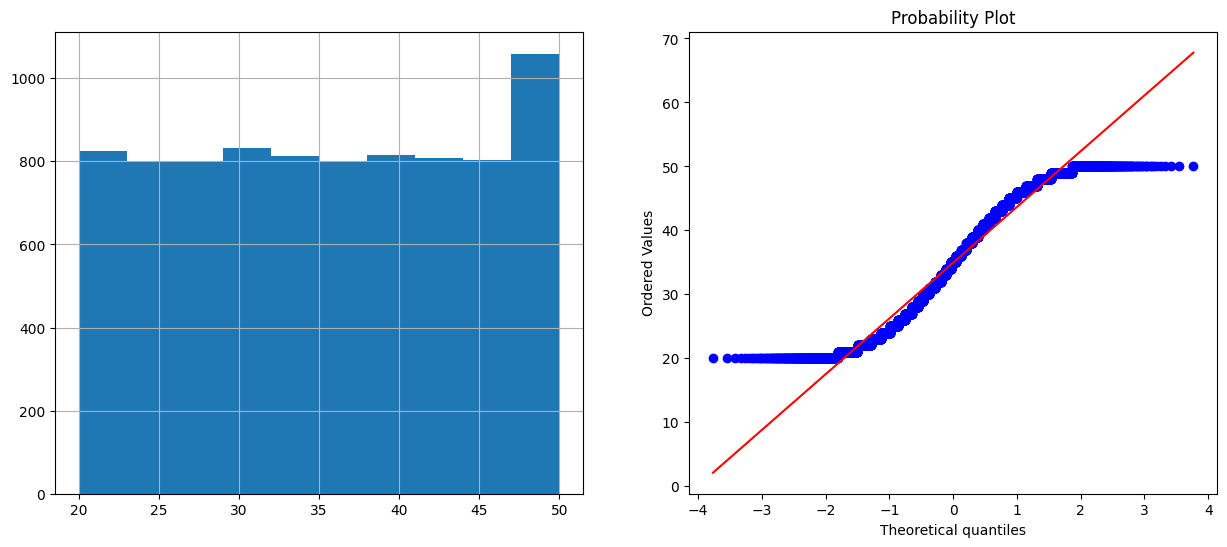

Humidity9am


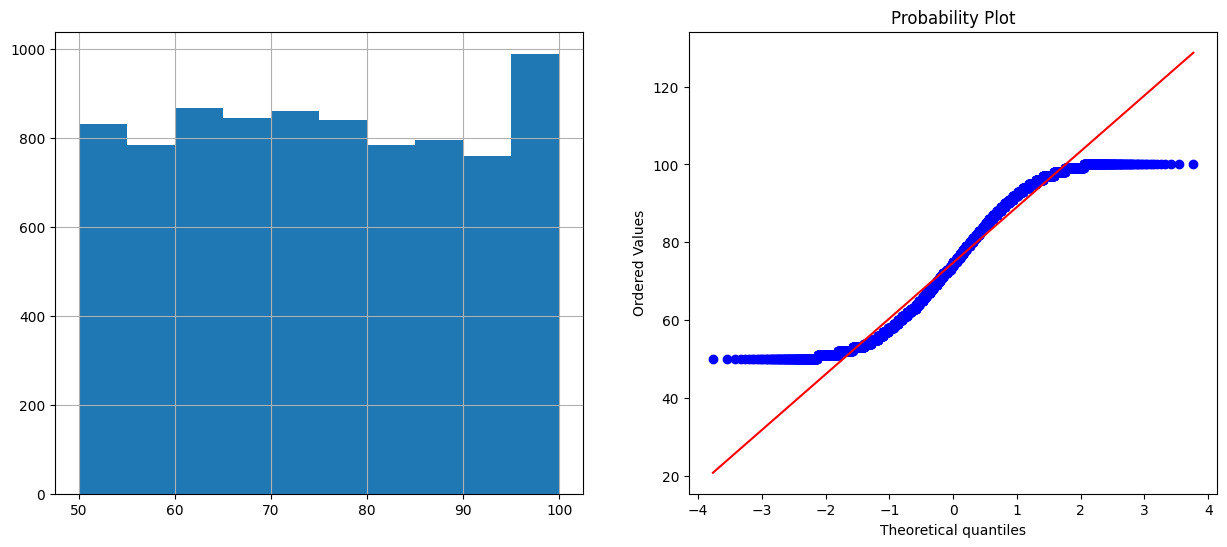

Humidity3pm


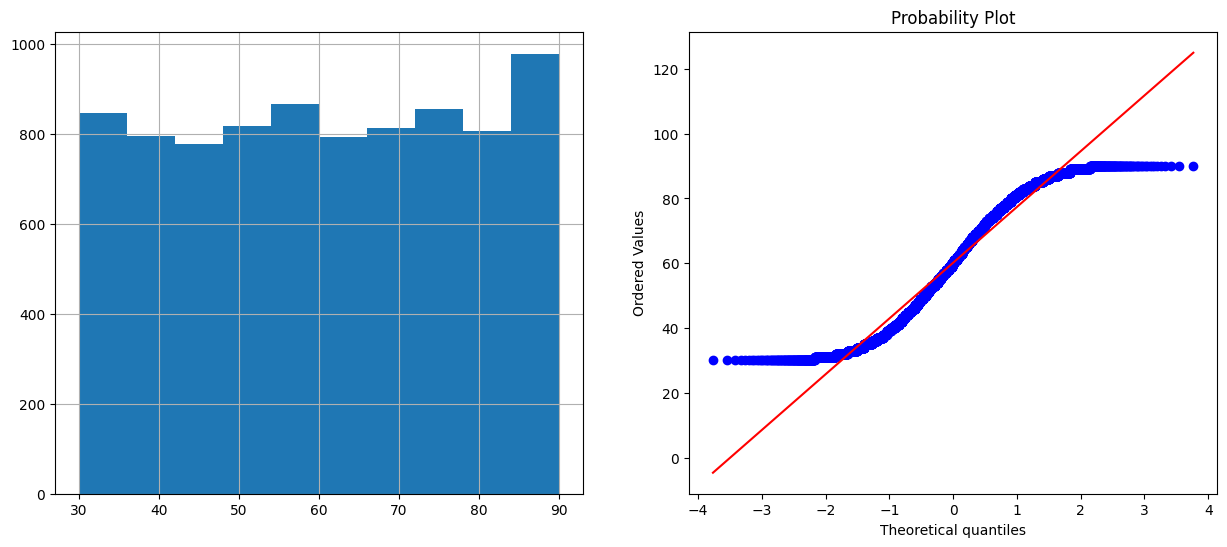

Pressure9am


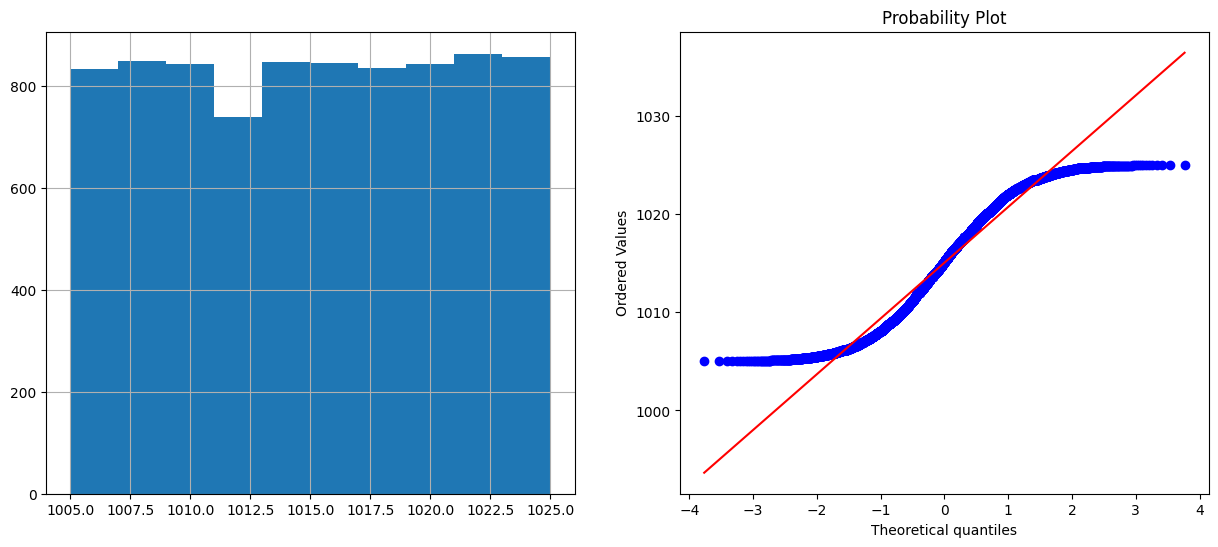

Pressure3pm


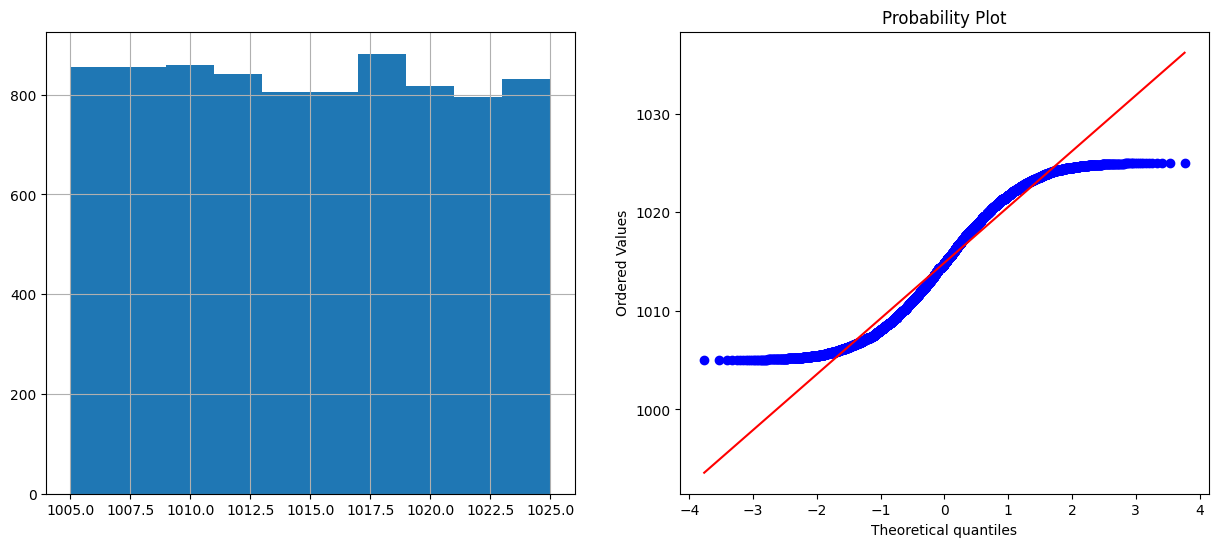

Temp9am


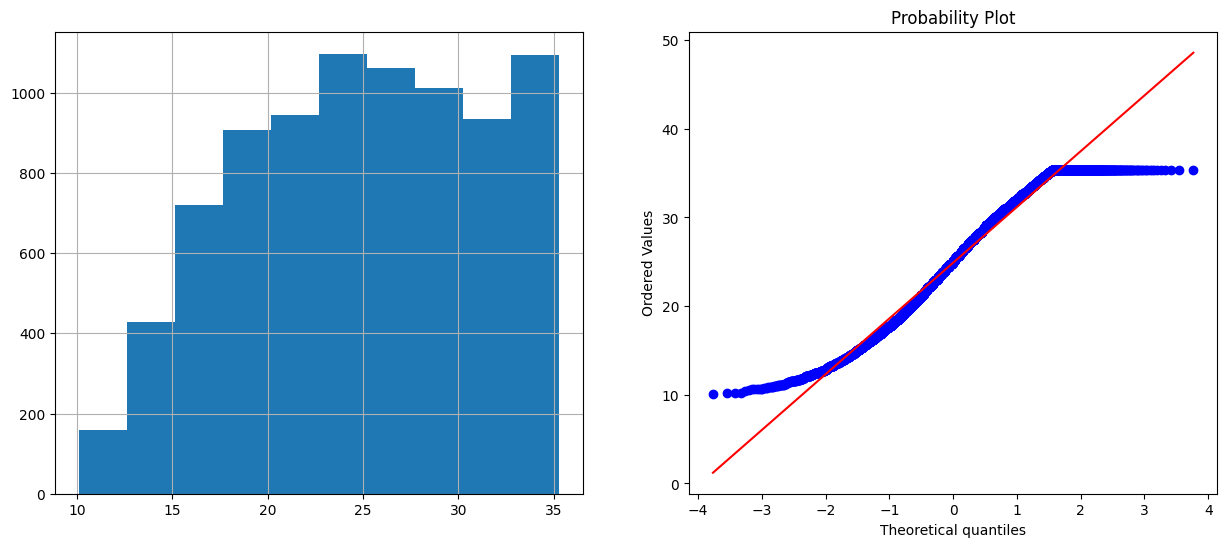

Temp3pm


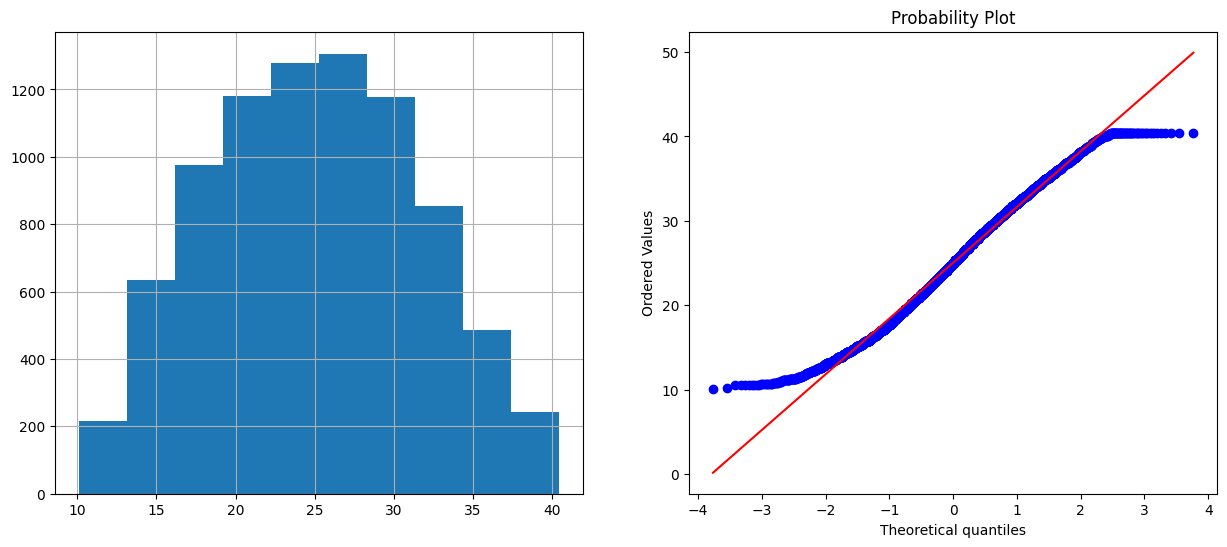

In [198]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

#### Pie Chart ####

In [199]:
a = df['RainToday'].value_counts()
b = df['RainTomorrow'].value_counts()

(np.float64(-1.1000000259291411),
 np.float64(1.0999999849669118),
 np.float64(-1.0999999871317907),
 np.float64(1.099999999387228))

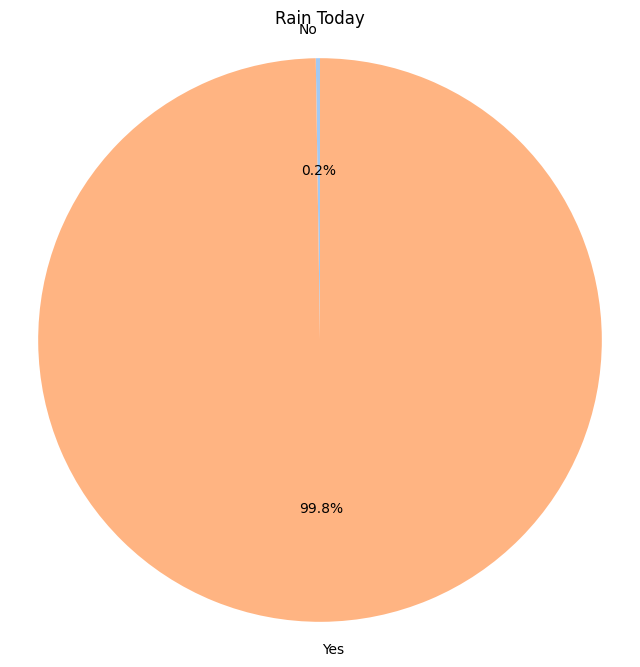

In [200]:
labels = ['No', 'Yes']
sizes = [a[False], a[True]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Rain Today')
plt.axis('equal')


(np.float64(-1.0999986305703051),
 np.float64(1.09999199183886),
 np.float64(-1.0999990060908507),
 np.float64(1.099999952670993))

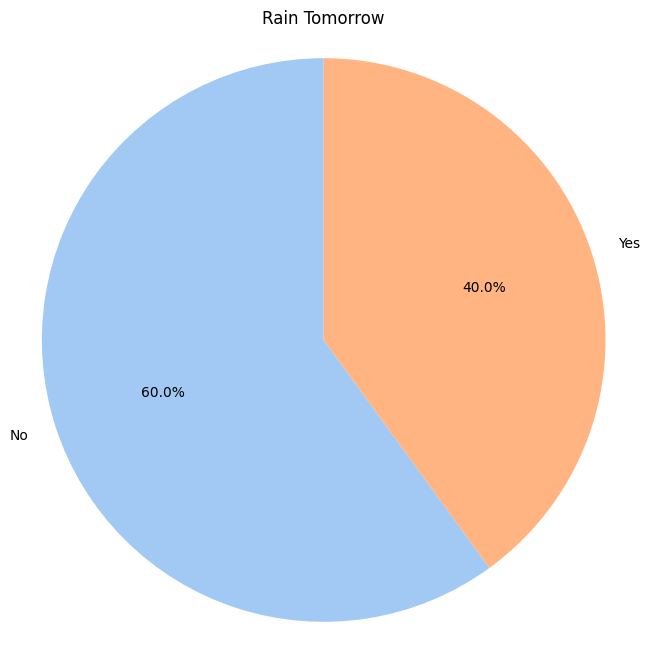

In [201]:
labels = ['No', 'Yes']
sizes = [b[False], b[True]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Rain Tomorrow')
plt.axis('equal')


#### Bar Graph showing the count of Rain tomorrow

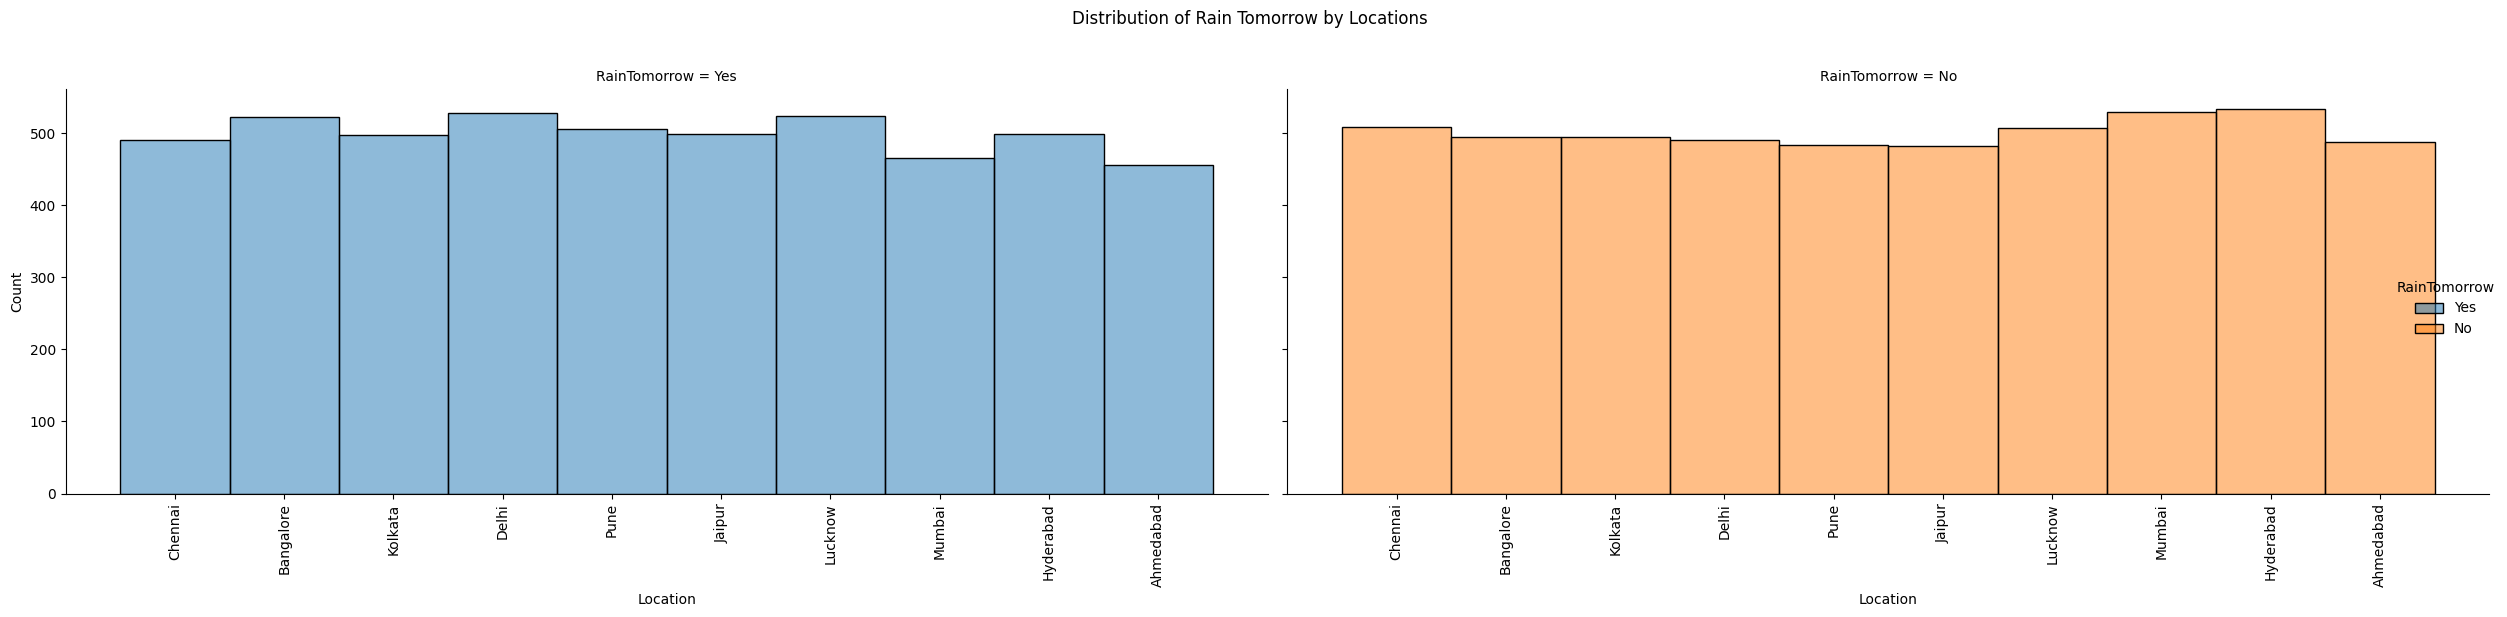

In [202]:
g = sns.displot(data=original_df, x='Location', hue='RainTomorrow', col='RainTomorrow', height=6, aspect=2)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Distribution of Rain Tomorrow by Locations', y=1.02)
plt.tight_layout()

####  Pair plot the training dataset to determine the optimal collection of features for explaining a connection between two variables or for forming the most distinct clusters.

In [203]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
1          3     17.0     23.6       1.5          9.8      11.8           14   
2          5     10.5     21.0       1.5          0.4       9.5           15   
6          4     13.9     21.5       1.5          8.6       3.0            1   
8         10     13.7     28.7       0.2          9.2       2.0            8   
10         1     18.3     26.7       1.5         14.3       2.1            3   

    WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
1            40.0           8          14            20          15.0   
2            40.0           1           1            16           9.0   
6            29.0           4           0            19          18.0   
8            25.0           6           3            17          13.0   
10           50.0          11           4             7          18.0   

    Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
1            94           86       1005.9       1021.7       3.0       2.0   
2            52           41       1011.0       1020.9       2.0       1.0   
6            94           55       1014.1       1016.0       5.0       0.0   
8            86           35       1022.5       1013.9       0.0       3.0   
10           77           75       1005.8       1018.6       8.0       3.0   

    Temp9am  Temp3pm  RainToday  RainTomorrow  Date_month  
1      18.4     20.8       True         False          11  
2      16.0     10.6       True         False          11  
6      20.5     20.3       True         False          12  
8      14.1     15.4       True         False           3  
10     25.7     19.2       True         False          11

In [204]:
df.to_csv("balancedData.csv", index=False)

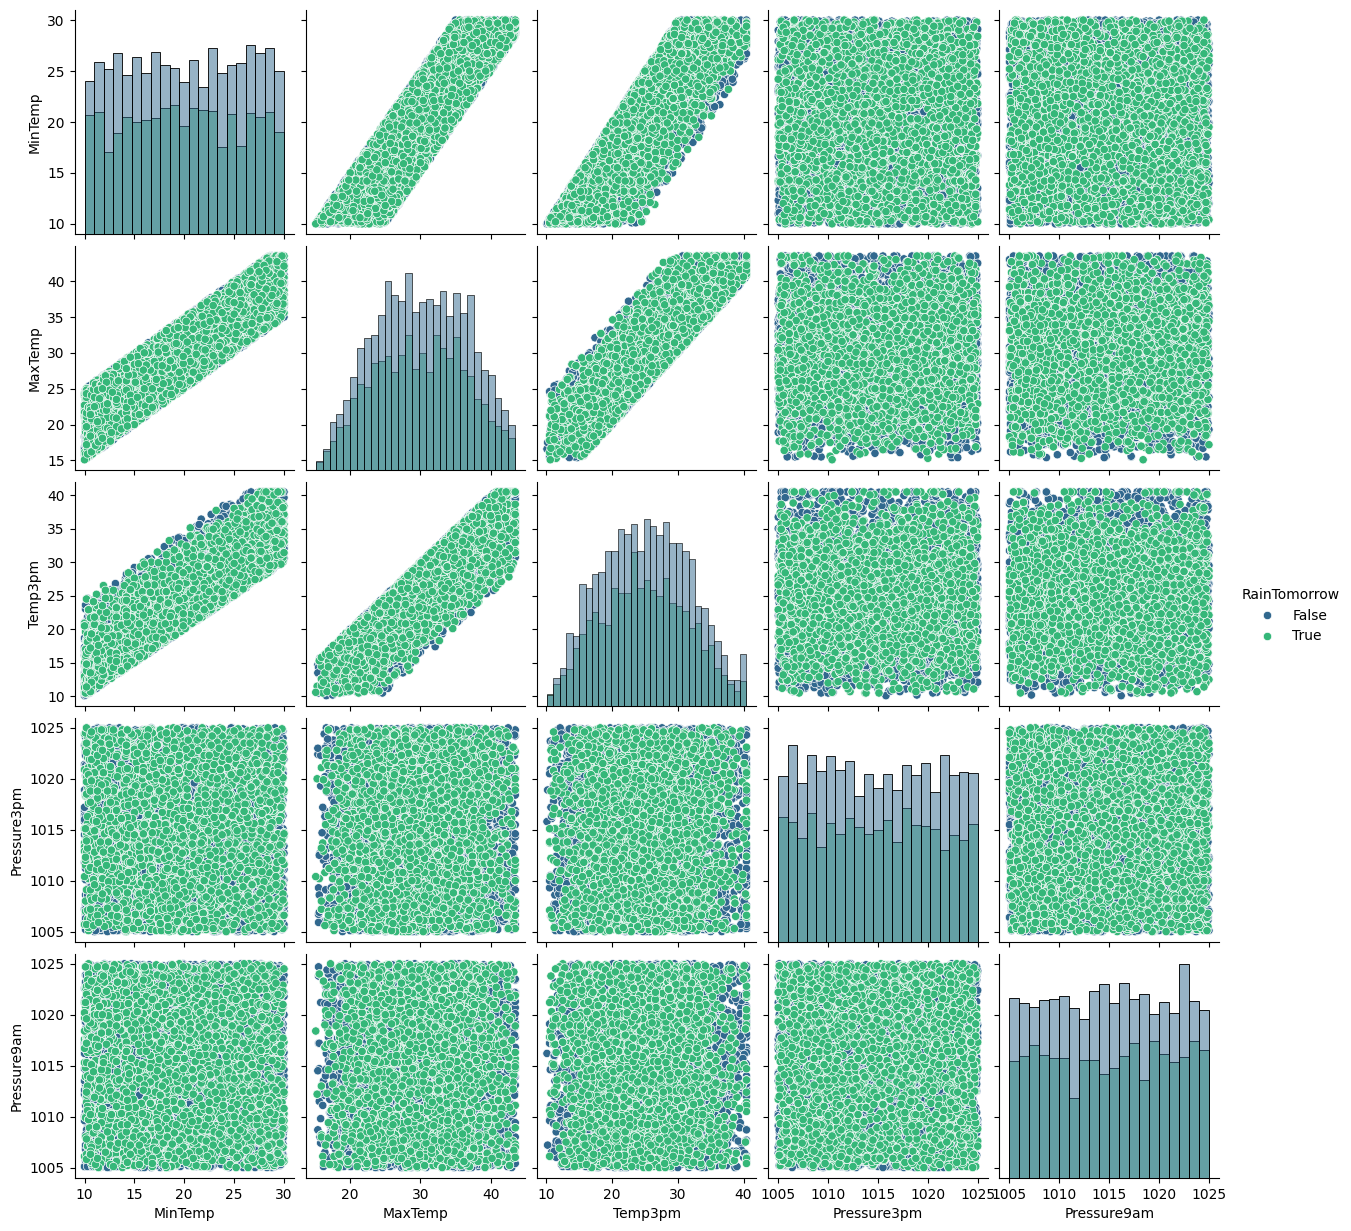

In [205]:
sns.pairplot(data=df[['MinTemp', 'MaxTemp', 'Temp3pm', 'Pressure3pm', 'Pressure9am', 'RainTomorrow']], hue='RainTomorrow',palette='viridis',diag_kind='hist')
# df.columns

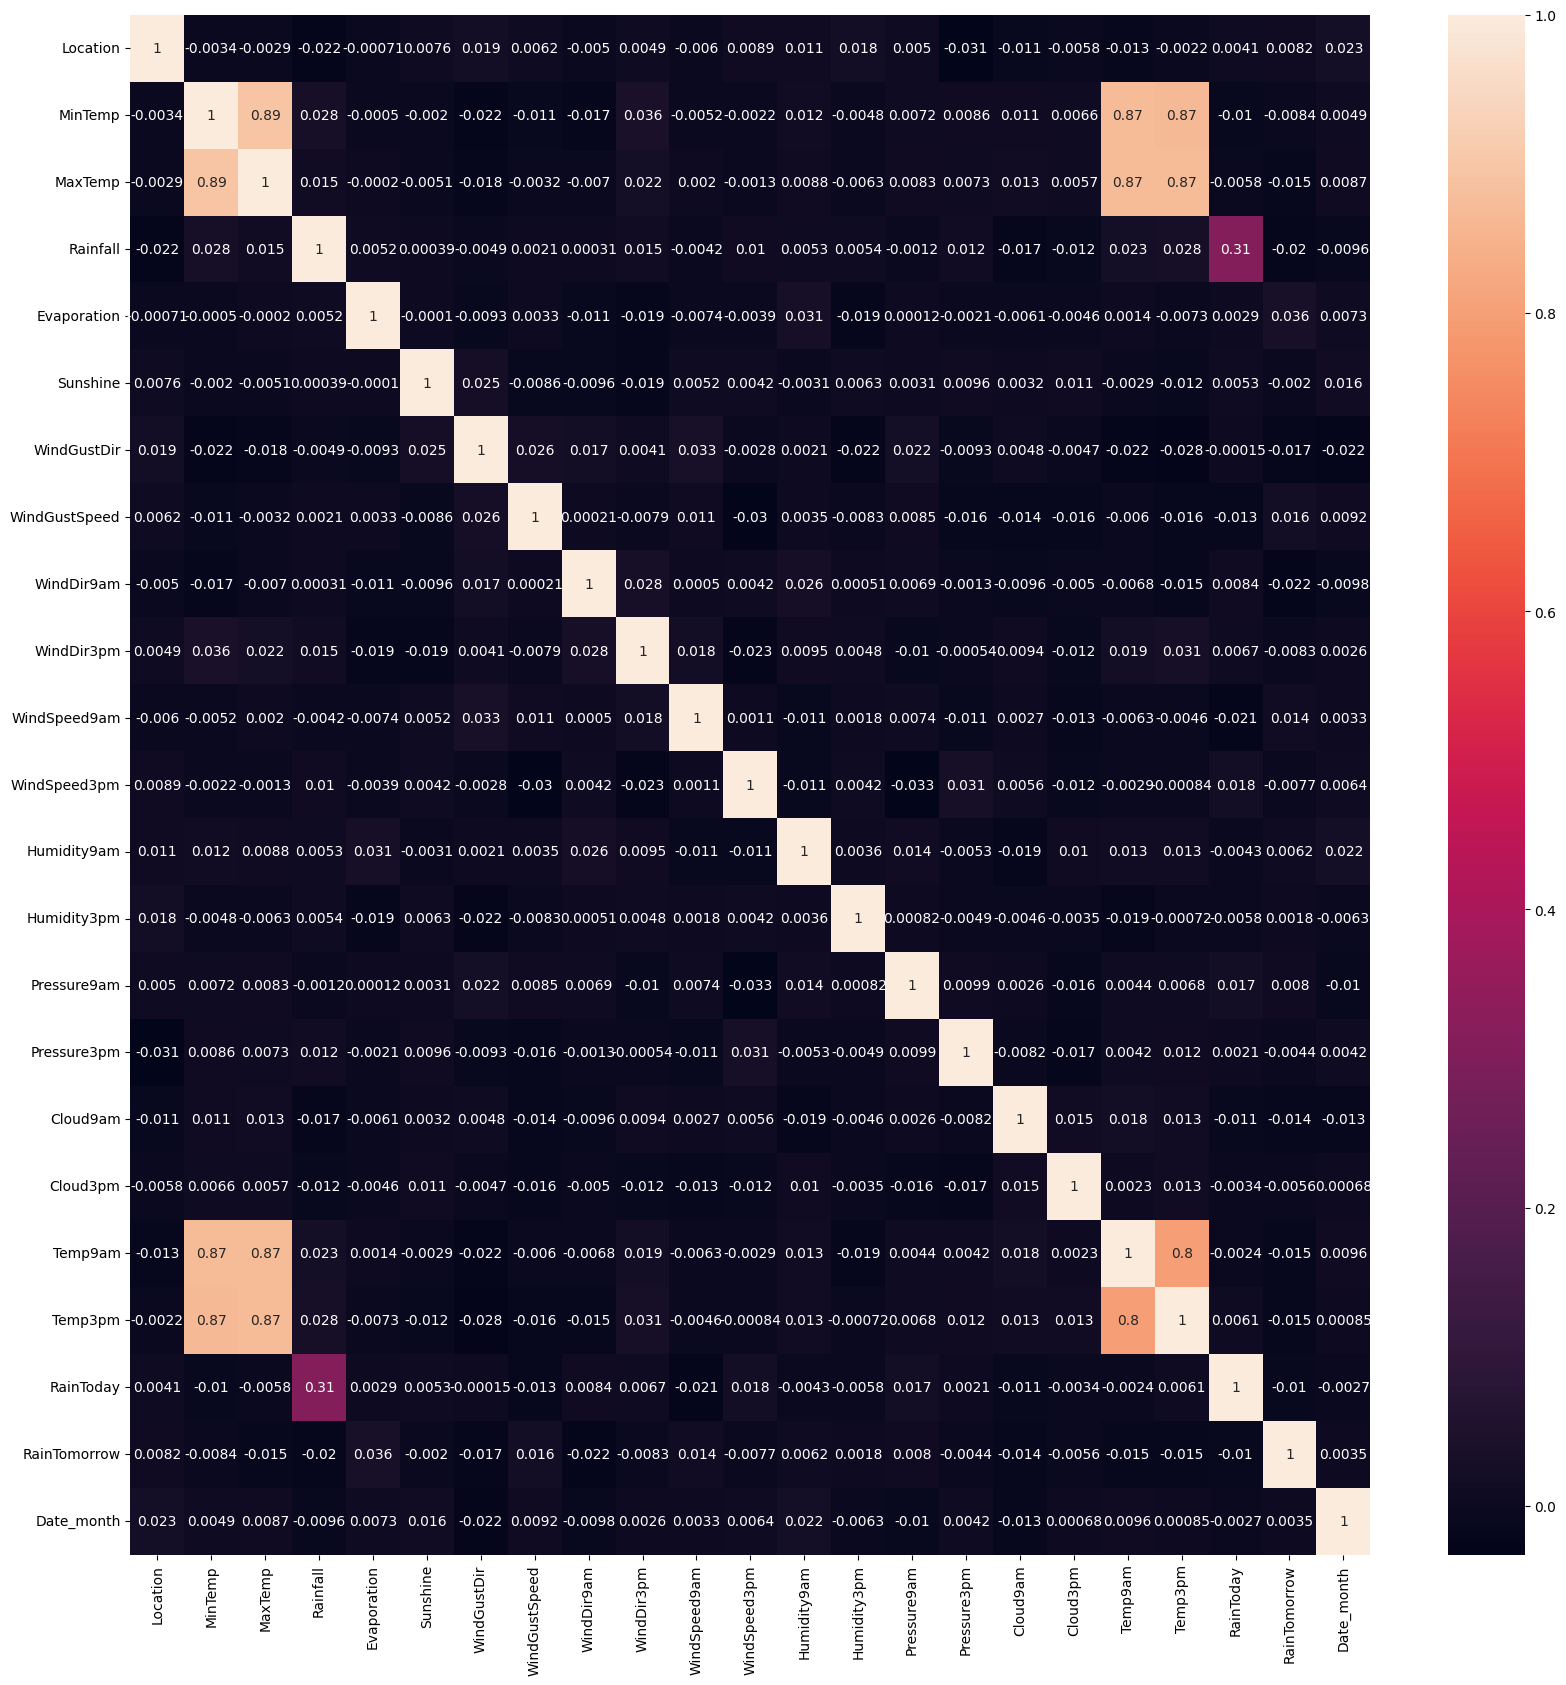

In [206]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)